## Libreria

In [ ]:
!pip install tensorflow==2.15

In [ ]:
import numpy as np
from scipy import misc, ndimage, signal
import time
import time as tm
import random
import ntpath
import os
import pandas as pd
#import cv2
import sys
import glob

#libreria para Visualizar datos
import matplotlib.pyplot as plt


#libreria para diseñar los Modelos de deep learning
from tensorflow.keras.layers import Concatenate, Lambda
from tensorflow.keras import backend
from tensorflow.keras.layers import Lambda, Layer
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, LSTM, SpatialDropout2D, Concatenate, Lambda
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D, UpSampling2D, BatchNormalization, ReLU
import tensorflow as tf
from keras.layers import concatenate
from tensorflow.keras.layers import Add
from tensorflow.keras.layers import concatenate
#from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.base import BaseEstimator
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import load_model

# Libreria para obtener metricas
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import hamming_loss
from sklearn.metrics import log_loss
from sklearn.metrics import zero_one_loss
from sklearn.metrics import matthews_corrcoef

# libreria para realizar pre procesamientos
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

## libreria para binarizar datos
from sklearn.preprocessing import label_binarize

# libreria para partir los datos en entrenamiento y test
from sklearn.model_selection import train_test_split

# librerias para K-folds
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# graficar modelo creado
from tensorflow.keras.utils import plot_model

# time
import datetime

#segmentar
from scipy import misc
from scipy import ndimage
import copy

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

import math

from scipy import misc, ndimage, signal
from sklearn.model_selection  import train_test_split
import numpy
import numpy as np
import random
import ntpath
import os
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from keras import optimizers
from keras import regularizers
import tensorflow as tf
import cv2
from keras import backend as K
from time import time
import time as tm
import datetime
from operator import itemgetter
import glob
from skimage.util.shape import view_as_blocks
#from keras.utils import np_utils
#from keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, LSTM, SpatialDropout2D, Concatenate, Lambda
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D, UpSampling2D, BatchNormalization, ReLU

from scipy import misc, ndimage, signal
from sklearn.model_selection  import train_test_split
import random
import ntpath
import os
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from keras import optimizers
from keras import regularizers
import tensorflow as tf
import cv2
from time import time
import time as tm
import datetime
from operator import itemgetter
import glob
from skimage.util.shape import view_as_blocks
#from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical
from keras.metrics import Accuracy, Precision, Recall, AUC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from yellowbrick.classifier import ClassificationReport

In [ ]:
print(tf.__version__)

2.15.0


In [ ]:
print(sys.version)

3.11.11 (main, Dec  4 2024, 08:55:07) [GCC 11.4.0]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Load data

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import os
import joblib
#Cargar los datos planos desde el archivo CSV
flat_data_path = "/content/drive/MyDrive/BrainLat/Brainlat_Prueba/brainlat_EEG_Clean_Prueba.csv"
flat_data = pd.read_csv(flat_data_path)  # Ajustar el delimitador según corresponda
#quitar dos clase
# flat_data = flat_data[(flat_data['diagnosis_x'] =='AD')]

In [ ]:
# flat_data = flat_data.drop(['moca_total', 'ifs_total_score', 'path', 'diagnosis_y','has_stft'], axis=1)

In [ ]:
#redondear valores numericos a enteros
# flat_data = flat_data.round()

In [ ]:
flat_data["diagnosis_x"].unique()

array(['AD', 'FTD', 'CN'], dtype=object)

In [ ]:
# Codificar las etiquetas y seleccionar las características
flat_data['diagnosis_x'] = LabelEncoder().fit_transform(flat_data['diagnosis_x'])
labels = flat_data['diagnosis_x'].to_numpy()
features = flat_data.drop(['id EEG', 'diagnosis_x'], axis=1)  # Excluir columnas irrelevantes

In [ ]:
flat_data["diagnosis_x"].unique()

array([0, 2, 1])

In [ ]:
# Ruta base para las STFT
stft_folder = "/content/drive/MyDrive/BrainLat/Vectores/sfft"
# Inicializar listas para almacenar datos
eeg_data = []
labels_stft = []
flat_features = []

# Recorrer los registros para cargar STFT y emparejar con los datos planos
for index, row in flat_data.iterrows():
    participant_id = row['id EEG']
    label_folder = None

    # Determinar la subcarpeta basada en el diagnóstico
    if row['diagnosis_x'] == 0:  # Cambiar el mapeo según corresponda
        label_folder = "1_AD"
    elif row['diagnosis_x'] == 2:
        label_folder = "2_bvFTD"
    elif row['diagnosis_x'] == 1:
        label_folder = "5_HC"

    if label_folder:
        file_path = os.path.join(stft_folder, label_folder, f"{participant_id}.npy")
        print(file_path)
        if os.path.exists(file_path):
            eeg_array = np.load(file_path)
            eeg_data.append(eeg_array)
            labels_stft.append(row['diagnosis_x'])
            flat_features.append(features.loc[index].to_numpy())
        else:
            print(f"Archivo {file_path} no encontrado. Ignorando este participante.")

# Convertir las listas a numpy arrays
eeg_data = np.array(eeg_data)  # STFT
flat_features = np.array(flat_features)  # Datos planos
labels_stft = np.array(labels_stft)  # Etiquetas

/content/drive/MyDrive/BrainLat/Vectores/sfft/1_AD/sub-30001.npy
/content/drive/MyDrive/BrainLat/Vectores/sfft/1_AD/sub-30002.npy
/content/drive/MyDrive/BrainLat/Vectores/sfft/1_AD/sub-30004.npy
/content/drive/MyDrive/BrainLat/Vectores/sfft/1_AD/sub-30008.npy
/content/drive/MyDrive/BrainLat/Vectores/sfft/1_AD/sub-30009.npy
/content/drive/MyDrive/BrainLat/Vectores/sfft/1_AD/sub-30011.npy
/content/drive/MyDrive/BrainLat/Vectores/sfft/1_AD/sub-30012.npy
/content/drive/MyDrive/BrainLat/Vectores/sfft/1_AD/sub-30013.npy
/content/drive/MyDrive/BrainLat/Vectores/sfft/1_AD/sub-30015.npy
/content/drive/MyDrive/BrainLat/Vectores/sfft/1_AD/sub-30018.npy
/content/drive/MyDrive/BrainLat/Vectores/sfft/1_AD/sub-30020.npy
/content/drive/MyDrive/BrainLat/Vectores/sfft/1_AD/sub-30022.npy
/content/drive/MyDrive/BrainLat/Vectores/sfft/1_AD/sub-30026.npy
/content/drive/MyDrive/BrainLat/Vectores/sfft/1_AD/sub-30029.npy
/content/drive/MyDrive/BrainLat/Vectores/sfft/1_AD/sub-30031.npy
/content/drive/MyDrive/Br

In [ ]:
#ver la cantidad de unicos en labels_stft
np.unique(labels_stft, return_counts=True)

(array([0, 1, 2]), array([28, 17, 13]))

In [ ]:
# Obtener índices por clase
ad_indices = np.where(labels_stft == 0)[0]  # Asumiendo AD=0
ftd_indices = np.where(labels_stft == 2)[0]  # Asumiendo FTD=2
cn_indices = np.where(labels_stft == 1)[0]   # Asumiendo CN=1

# Acceder a los datos correspondientes
AD_eeg = eeg_data[ad_indices]
AD_flat = flat_features[ad_indices]

FTD_eeg = eeg_data[ftd_indices]
FTD_flat = flat_features[ftd_indices]

CN_eeg = eeg_data[cn_indices]
CN_flat = flat_features[cn_indices]
# 1) Dividir los datos en train y test
X_train_flat, X_test_flat, y_train, y_test = train_test_split(
    flat_features,
    labels_stft,
    test_size=0.2,
    random_state=45,
    stratify=labels_stft
)
# 2) Ajustar el StandardScaler solo con datos de entrenamiento
scaler = StandardScaler().fit(X_train_flat)
# 4) Transformar también los subconjuntos (AD_flat, FTD_flat, CN_flat)
AD_flat  = scaler.transform(AD_flat)
FTD_flat = scaler.transform(FTD_flat)
CN_flat  = scaler.transform(CN_flat)

In [ ]:
print(AD_flat.shape)
print(FTD_flat.shape)
print(CN_flat.shape)
print(AD_eeg.shape)
print(FTD_eeg.shape)
print(CN_eeg.shape)

(28, 21)
(13, 21)
(17, 21)
(28, 224, 224, 128)
(13, 224, 224, 128)
(17, 224, 224, 128)


## Load Model

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
#limpiar sesion
tf.keras.backend.clear_session()
# Definir la capa personalizada CrossAttention
@tf.keras.utils.register_keras_serializable()
class CrossAttention(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super().__init__()
        self.mha = tf.keras.layers.MultiHeadAttention(**kwargs)
        self.add = tf.keras.layers.Add()
        self.layernorm = tf.keras.layers.LayerNormalization()

    def call(self, x, y, **kwargs):
        attn, attention_scores = self.mha(
            query=x, value=y,
            return_attention_scores=True
        )
        self.last_attention_scores = attention_scores
        x = self.add([x, attn])
        return self.layernorm(x)

# Cargar el modelo con la capa personalizada
model = load_model(
    "/content/drive/MyDrive/BrainLat/Bimodal/Experimentos/saved-model-clean-seed_45-3C-128-1.0000.hdf5",
    custom_objects={"CrossAttention": CrossAttention}
)

In [ ]:
cross_attention_layer = model.get_layer("cross_attention")
print(cross_attention_layer)

In [ ]:
# Obtener las salidas de la capa CrossAttention
outputs = cross_attention_layer.output

# Imprimir las formas de salida
if isinstance(outputs, list):
    for i, output in enumerate(outputs):
        print(f"Salida {i}: {output.shape}")
else:
    print(f"Forma de salida: {outputs.shape}")

Forma de salida: (None, 10, 128)


In [ ]:
# Mostrar resumen del modelo
model.summary()

# Graficar la red
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=True, show_layer_names=True
)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_A (InputLayer)        [(None, 224, 224, 128)]      0         []                            
                                                                                                  
 conv2d_1 (Conv2D)           (None, 112, 112, 64)         73792     ['input_A[0][0]']             
                                                                                                  
 batch_normalization_1 (Bat  (None, 112, 112, 64)         256       ['conv2d_1[0][0]']            
 chNormalization)                                                                                 
                                                                                                  
 re_lu (ReLU)                (None, 112, 112, 64)         0         ['batch_normalization_1[0]

# XAI for gradient descent focusing on Convolution

##Grad-Cam

In [ ]:
# @title Grad3D
from scipy.ndimage import zoom
def make_gradcam_heatmap(inputs, model, last_conv_layer_name, pred_index=None):
    """
    Generate class activation heatmap for a bimodal model.

    Args:
        inputs: A tuple containing the two inputs to the model (input_A, input_B).
        model: The trained Keras model.
        last_conv_layer_name: Name of the last convolutional layer to analyze.
        pred_index: Index of the class to compute Grad-CAM for. If None, use the top predicted class.

    Returns:
        Heatmap as a NumPy array.
    """
    # Unpack inputs
    input_A, input_B = inputs

    # Create a model that maps the inputs to the activations of the last convolutional layer and the output predictions
    grad_model = Model(
        inputs=model.inputs,
        outputs=[model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Compute the gradient of the top predicted class for the input with respect to the activations
    with tf.GradientTape() as tape:
        # Pass both inputs to the model
        last_conv_layer_output, preds = grad_model([input_A, input_B])

        # If pred_index is not provided, use the index of the top predicted class
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # Compute the gradient of the output neuron with respect to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # Compute the mean intensity of the gradient over each channel in the feature map (global average pooling)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Multiply each channel in the feature map array by 'how important this channel is'
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = tf.multiply(pooled_grads, last_conv_layer_output)

    # Normalize the heatmap between 0 & 1 for visualization
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)

    return heatmap.numpy()
def get_resized_heatmap(heatmap, shape):
    """Resize heatmap to match the shape of the original image"""
    # Rescale heatmap to a range 0-255 for visualization
    upscaled_heatmap = np.uint8(255 * heatmap)

    # Resize the heatmap to match the dimensions of the original image
    upscaled_heatmap = zoom(
        upscaled_heatmap,
        (
            shape[0] / upscaled_heatmap.shape[0],
            shape[1] / upscaled_heatmap.shape[1],
            shape[2] / upscaled_heatmap.shape[2],
        ),
    )
    return upscaled_heatmap

In [ ]:
# @title Grad1D
def gradcam1D(capa, inputs, clase, model, save_path):
    """
    Genera un Grad-CAM para la entrada de datos planos de un modelo bimodal.

    Args:
        capa: Nombre de la última capa convolucional a analizar.
        inputs: Tuple con las dos entradas (input_A, input_B), donde input_A es la serie temporal.
        clase: Nombre de la clase para etiquetar la imagen guardada.
        model: Modelo entrenado de Keras.
        save_path: Ruta donde se guardará la imagen.
    """
    input_A, input_B = inputs

    last_conv_layer = model.get_layer(capa)

    # Pasada hacia adelante para obtener la predicción
    predictions = model([input_A, input_B])
    predicted_class = np.argmax(predictions)

    # Obtener gradientes
    with tf.GradientTape() as tape:
        intermediate_model = Model(inputs=model.inputs, outputs=[last_conv_layer.output, model.output])
        conv_output, predictions = intermediate_model([input_A, input_B])
        loss = predictions[:, predicted_class]

    grads = tape.gradient(loss, conv_output)
    alpha_k = tf.reduce_mean(grads, axis=(1, 2))

    # Calcula Grad-CAM
    gradcam_1d = tf.nn.relu(tf.reduce_sum(tf.multiply(conv_output, alpha_k), axis=-1))

    #Visualizar
    plt.figure(figsize=(9, 3))  # Mucho más ancho y menos alto
    plt.plot(input_A[0], color='black')
    plt.imshow(gradcam_1d, alpha=0.4, cmap='jet', aspect="auto",
              extent=[0, input_A.shape[1]-1, np.min(input_A[0])-1, np.max(input_A[0])+1])
    plt.yticks([])
    plt.ylim(np.min(input_A[0])-1, np.max(input_A[0])+1)  # Ajusta los límites del eje Y
    plt.savefig(f"{save_path}/{clase}_{capa}.jpg", dpi=300, bbox_inches="tight")  # dpi alto y bbox ajustado
    plt.show()
    return gradcam_1d

In [ ]:
# @title gradcam_1D_for_flat_input

def gradcam_1D_for_flat_input(layer_name, inputs, clase_str, model, save_path=None):
    """
    Aplica Grad-CAM a una capa Conv1D en un modelo bimodal donde la rama tabular
    se pasa como (1, 21) en vez de (1,21,1).

    Parámetros:
      layer_name:  str, nombre de la capa conv1D a analizar (p. ej. "conv1d_4").
      inputs:      tuple (input_A, input_B)
                   input_A = datos tabulares shape (1,21)
                   input_B = datos imagen shape (1,224,224,128) (o similar)
      clase_str:   string que describe la clase ("Alzheimer", etc.) para nombrar la figura.
      model:       tu modelo Keras entrenado (bimodal).
      save_path:   ruta para guardar la figura. Si None, solo muestra por pantalla.

    Retorna:
      Ninguno (solo grafica / guarda la figura).
    """

    # 1) Separamos las entradas
    input_A, input_B = inputs  # input_A => (1,21), input_B => (1,H,W,Channels)

    # 2) Hacemos forward pass para obtener la predicción y la clase predicha
    predictions = model([input_A, input_B])  # salida => (1,num_classes)
    predicted_class = tf.argmax(predictions[0]).numpy()  # escalar int

    # 3) Modelo intermedio que retorna (salida_capa_conv1D, salida_final)
    last_conv_layer = model.get_layer(layer_name)
    intermediate_model = Model(
        inputs=model.inputs,
        outputs=[last_conv_layer.output, model.output]
    )

    # 4) Usamos GradientTape para obtener los gradientes de la clase predicha
    #    respecto a la salida de la capa conv1D
    with tf.GradientTape() as tape:
        conv_output, pred_out = intermediate_model([input_A, input_B])
        # Seleccionamos la prob/logit de la clase predicha
        loss = pred_out[:, predicted_class]

    grads = tape.gradient(loss, conv_output)
    # conv_output.shape => (1,21,filters)
    # grads.shape       => (1,21,filters)

    # 5) Calculamos alpha_k = media de grads en la dimensión "steps" (la 1)
    #    alpha_k.shape => (1, filters)
    alpha_k = tf.reduce_mean(grads, axis=1)

    # 6) Grad-CAM => ReLU( sum_k( alpha_k * conv_output_k ) )
    #    => sumamos en el eje de canales (axis=-1)
    gradcam_1d = tf.nn.relu(tf.reduce_sum(conv_output * alpha_k[:, tf.newaxis, :], axis=-1))
    # gradcam_1d.shape => (1,21)

    gradcam_1d = gradcam_1d[0].numpy()  # => (21,)

    # 7) Normalizamos [0,1] para visualizar
    gradcam_1d -= gradcam_1d.min()
    if gradcam_1d.max() > 0:
        gradcam_1d /= gradcam_1d.max()

    # 8) Extraer la señal original (1D) de input_A: shape => (1,21)
    #    Tomamos la fila 0 => (21,)
    signal_1d = input_A[0]


    # Eje X
    steps = np.arange(len(signal_1d))
    # Rango vertical para la superposición
    min_val, max_val = signal_1d.min(), signal_1d.max()

    # 9) Graficar
    plt.figure(figsize=(8,2))
    # Grafico la curva en negro
    plt.plot(steps, signal_1d, color='black', linewidth=2)

    # Mapa de calor vertical por encima
    gradcam_img = np.expand_dims(gradcam_1d, axis=0)  # => (1,21)
    plt.imshow(
        gradcam_img,
        aspect="auto",
        cmap="jet",
        alpha=0.4,
        extent=[0, len(signal_1d), min_val, max_val]
    )

    plt.title(f"Grad-CAM 1D: {layer_name}, clase={clase_str}")
    plt.yticks([])
    if save_path:
        plt.savefig(f"{save_path}/{clase_str}_{layer_name}.jpg", bbox_inches='tight')
    plt.show()

In [ ]:
# last_conv_layer_name = "conv1d_4"

# gradcam_1D_for_flat_input(
#     layer_name=last_conv_layer_name,
#     inputs=(input_A, input_B),
#     clase_str="Alzheimer",
#     model=model,
#     save_path="/content/"
# )

In [ ]:
# # Expandir dimensiones para agregar el batch size
# input_B = np.expand_dims(FTD_eeg[1], axis=0)  # Forma: (1, 224, 224, 128)
# input_A = np.expand_dims(FTD_flat[1], axis=0)  # Forma: (1, flat_features.shape[1], 1)

# # Nombre de la última capa convolucional a analizar
# last_conv_layer_name = "conv1d_4"  # Ajusta según tu modelo

# # Carpeta donde se guardará la imagen
# save_path = "/content/imagenes"

# # Generar el Grad-CAM para los datos planos
# gradcam1D("conv1d_4", (input_A, input_B), "Alzheimer", model, "/content/")

In [ ]:
# # Supongamos que tienes los siguientes datos:
# # - eeg_data_img: Datos de imágenes con forma (224, 224, 128)
# # - eeg_data_flat: Datos de características planas con forma (flat_features.shape[1], 1)

# # Expandir dimensiones para agregar el batch size
# input_B = np.expand_dims(eeg_data[0], axis=0)  # Forma: (1, 224, 224, 128)
# input_A = np.expand_dims(flat_features[1], axis=0)  # Forma: (1, flat_features.shape[1], 1)

# # Nombre de la última capa convolucional que deseas analizar
# last_conv_layer_name = "conv2d_16"  # Cambia esto según tu modelo

# # Generar el heatmap de Grad-CAM
# heatmap = make_gradcam_heatmap((input_A, input_B), model, last_conv_layer_name)

# # Redimensionar el heatmap para visualización
# resized_heatmap = get_resized_heatmap(heatmap, eeg_data[0].shape)

In [ ]:
# resized_heatmap.shape

In [ ]:
# y_range = (0, 40)
# x_range = (0, 40)
# plt.imshow(resized_heatmap[:,:,0], cmap='jet', extent=[x_range[0], x_range[1],y_range[0], y_range[1]])
# plt.xlabel('Time (Sec)')
# plt.ylabel('Frequency (Hz)')
# plt.xlim(x_range)
# plt.ylim(y_range)
# plt.grid(False)
# plt.xticks([])
# plt.title('Grad-CAM AD--Capa 16')
# plt.show()

## Grad-Cam per class

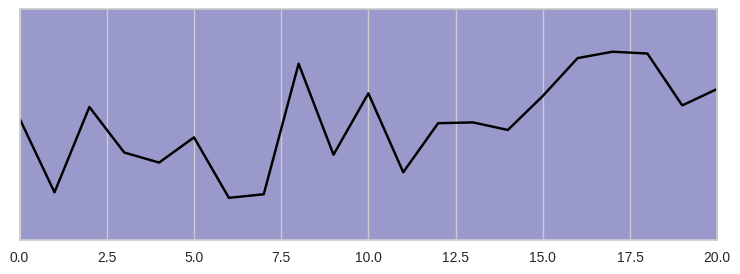

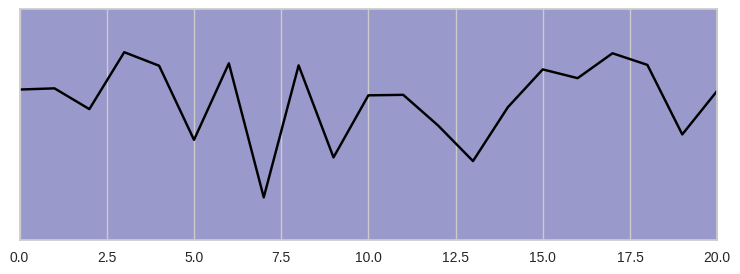

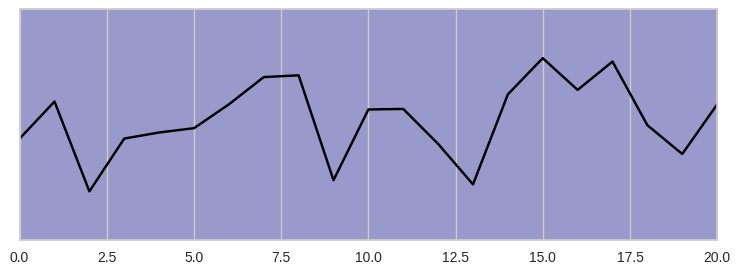

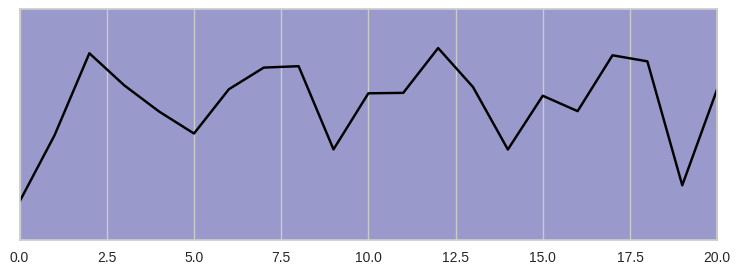

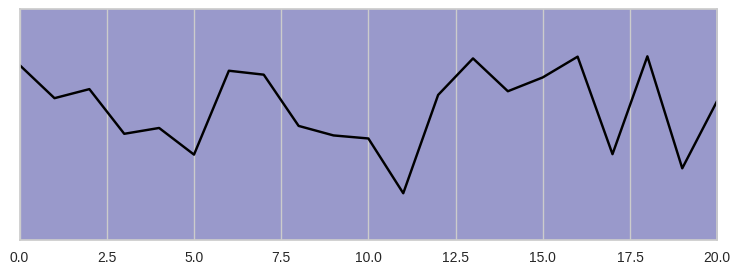

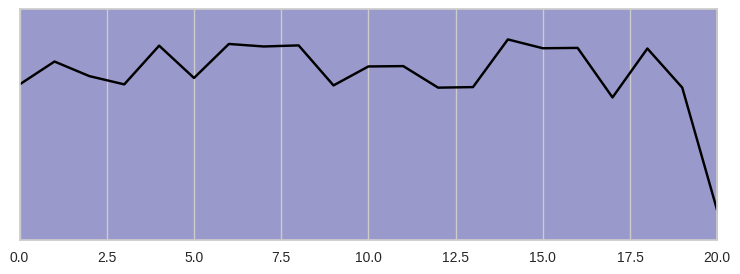

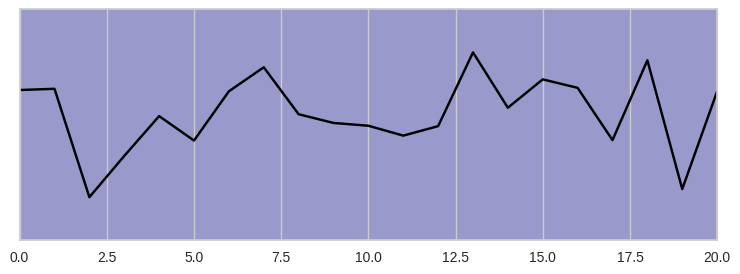

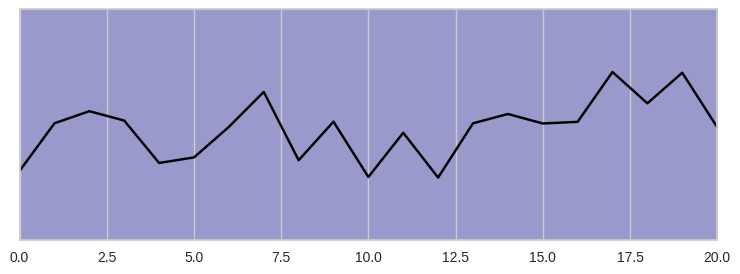

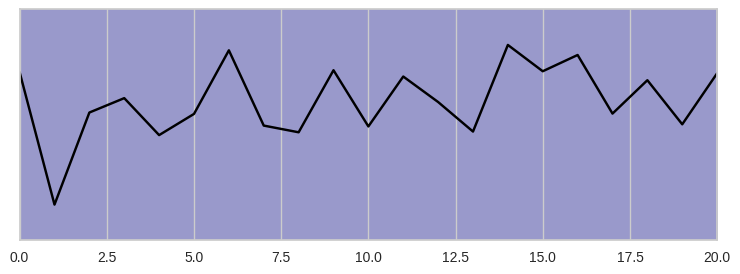

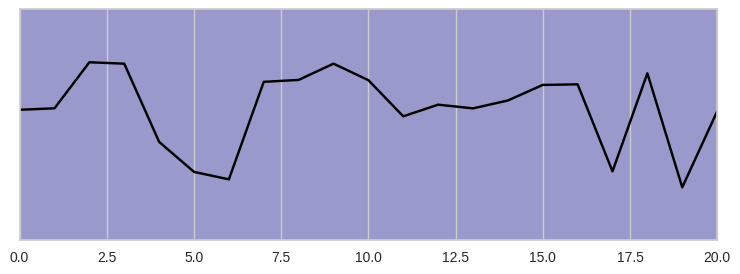

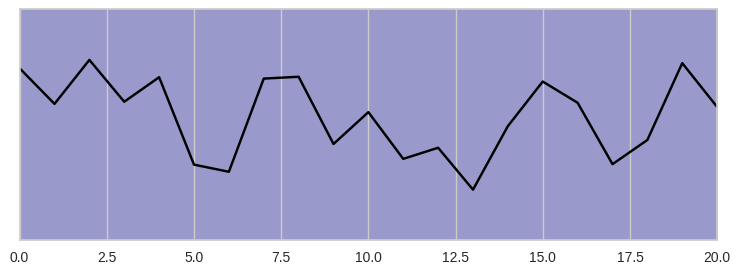

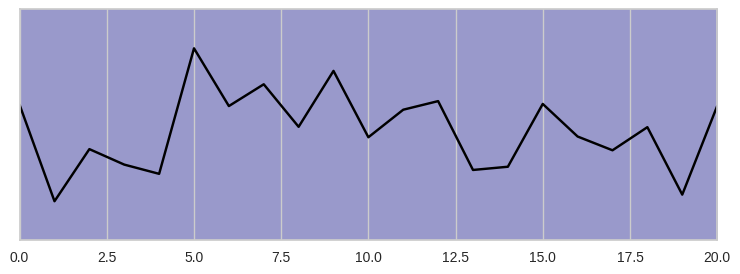

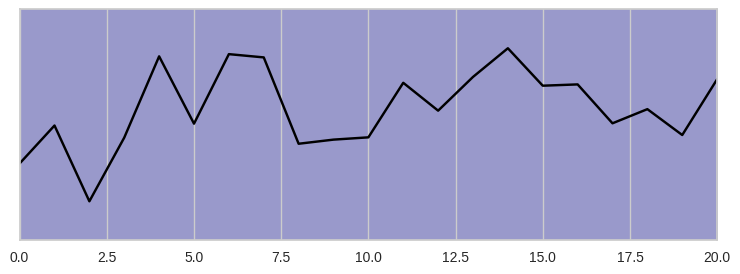

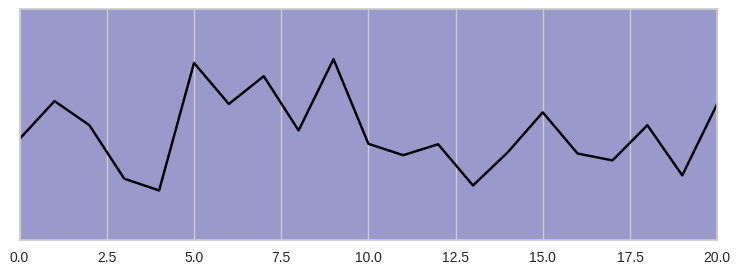

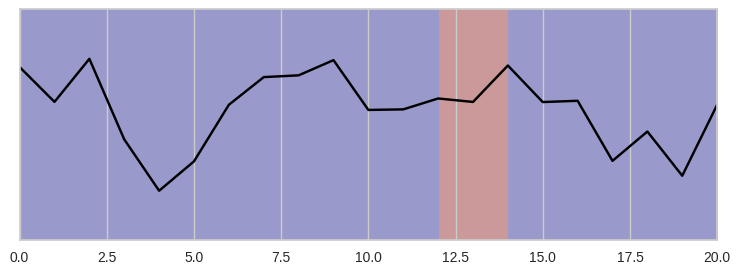

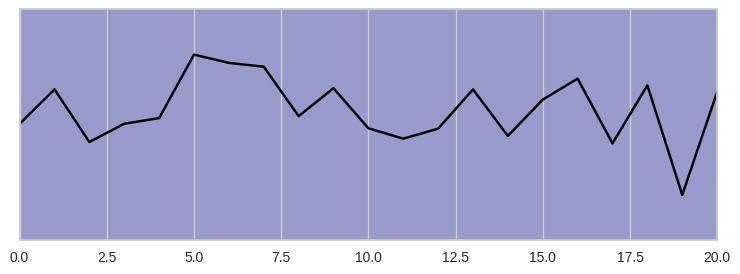

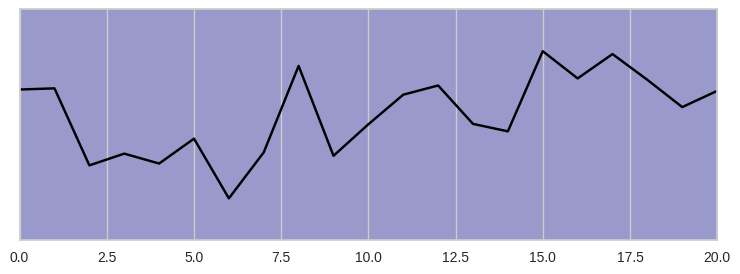

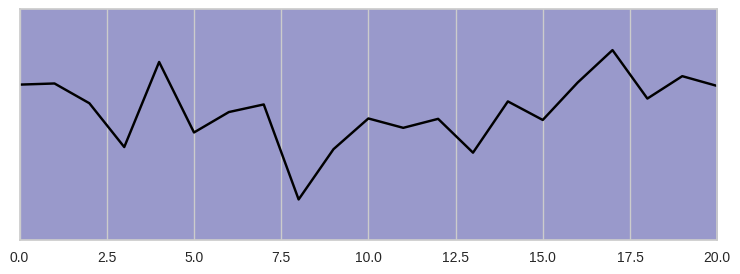

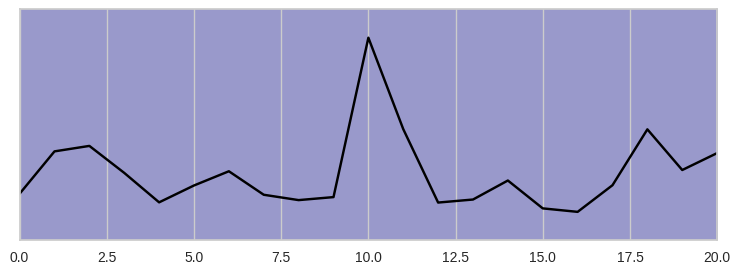

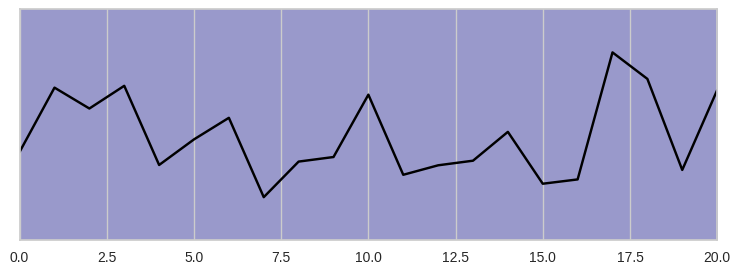

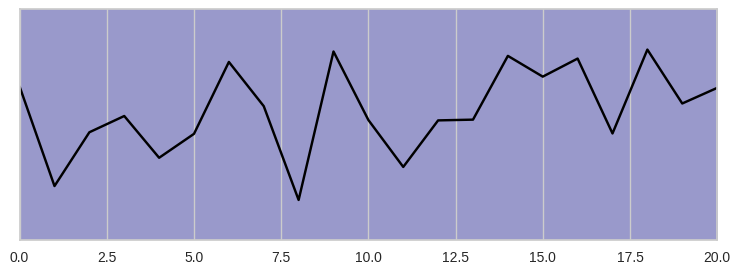

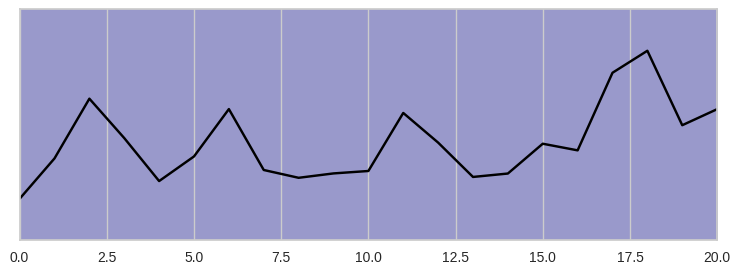

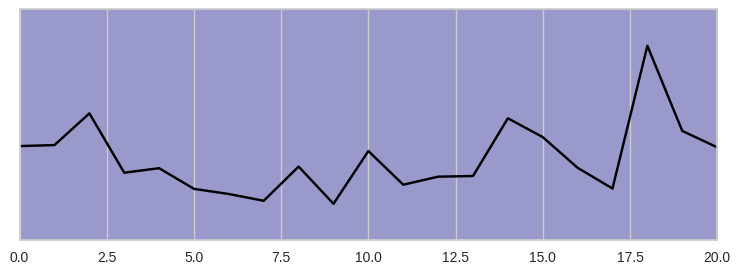

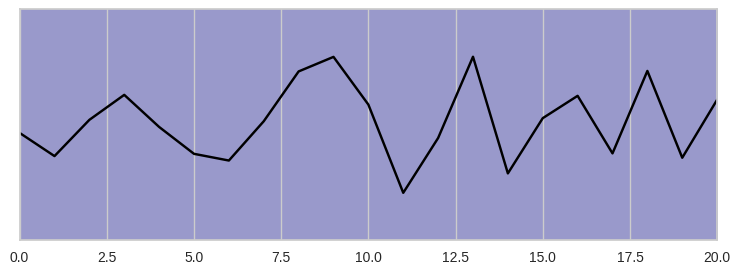

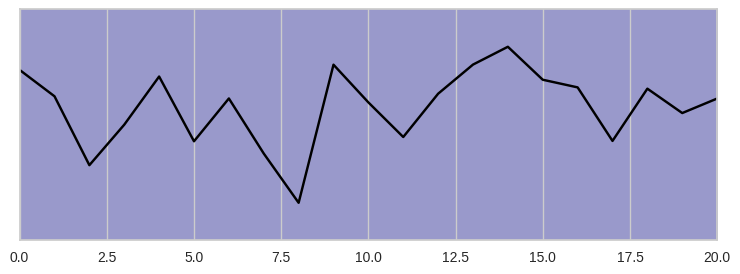

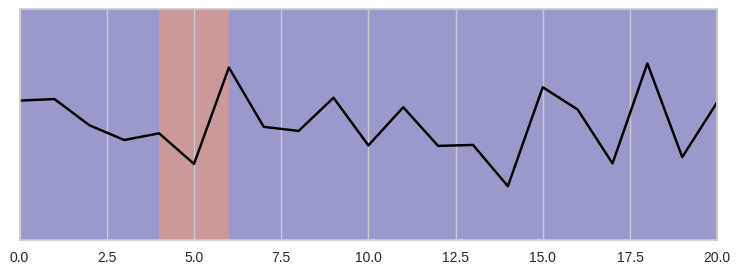

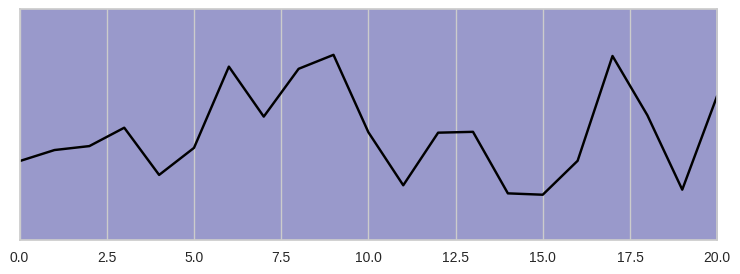

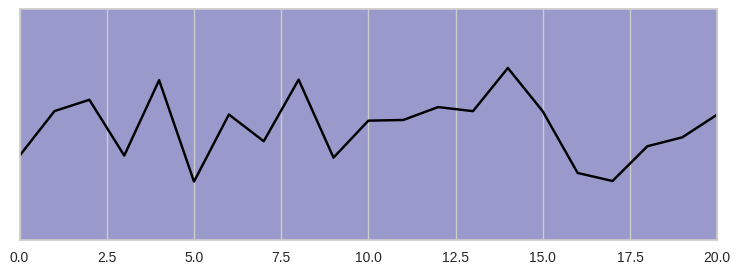

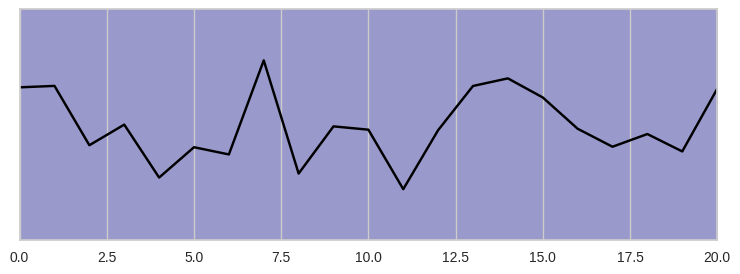

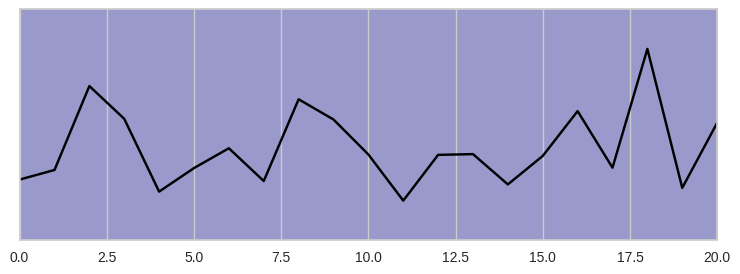

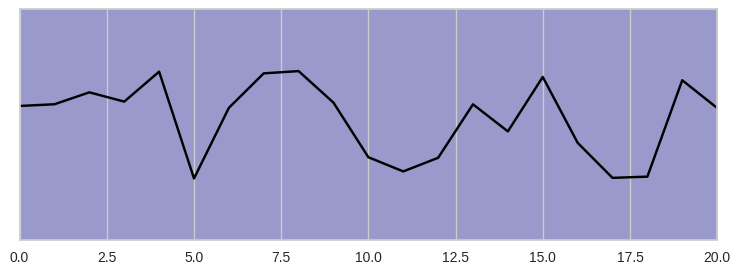

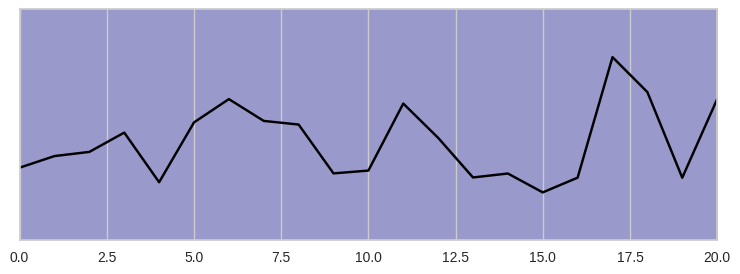

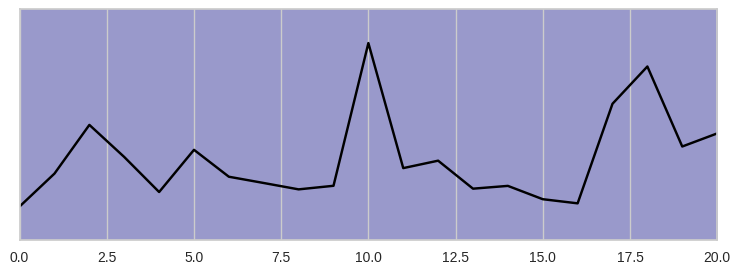

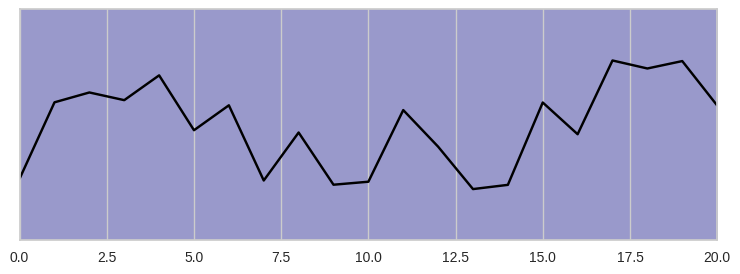

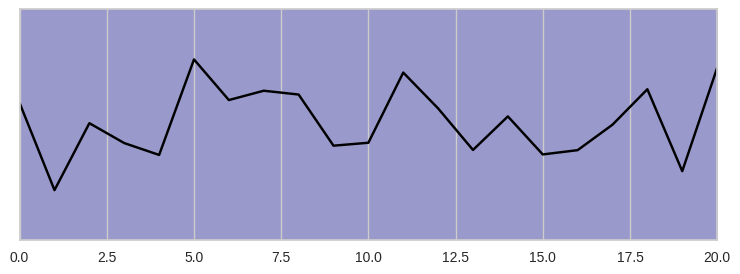

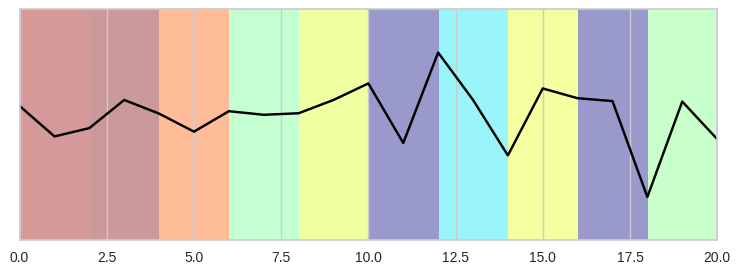

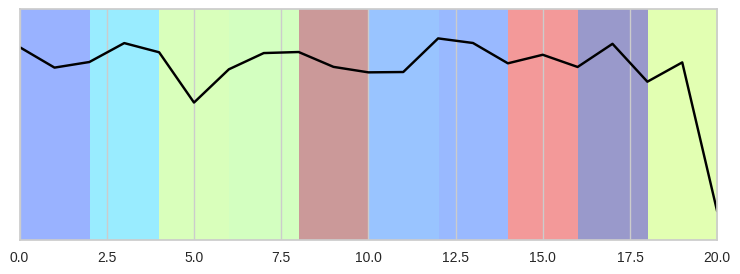

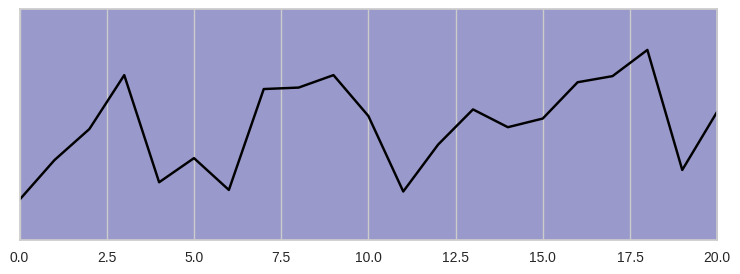

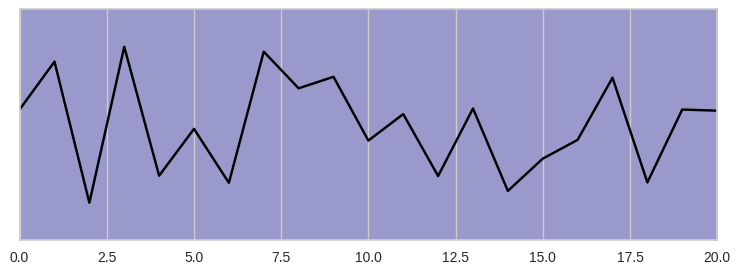

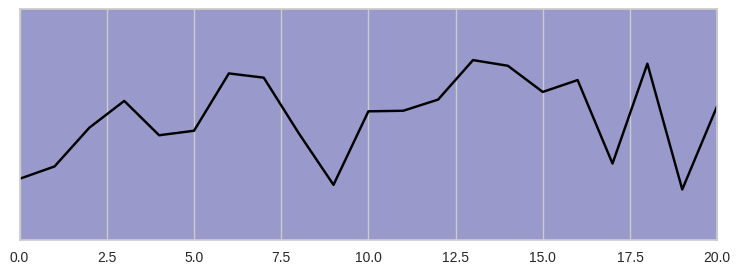

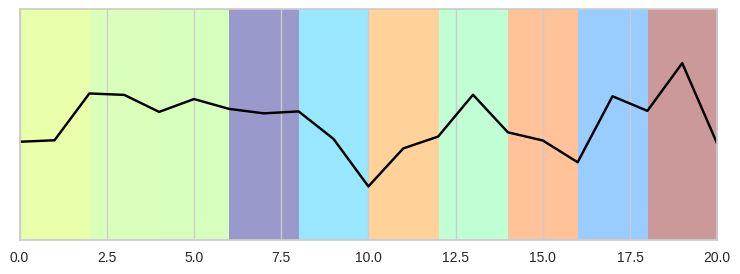

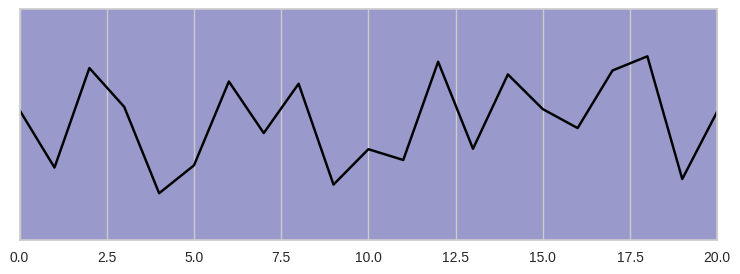

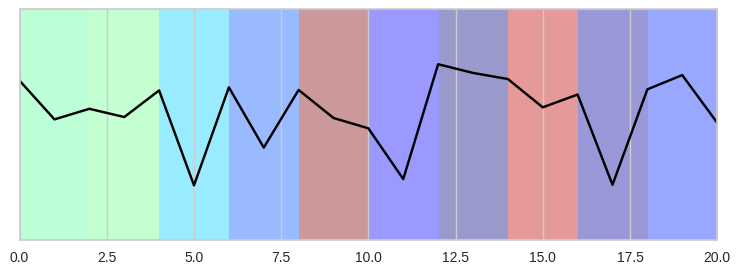

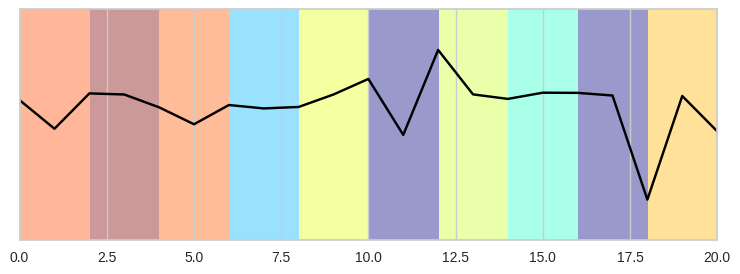

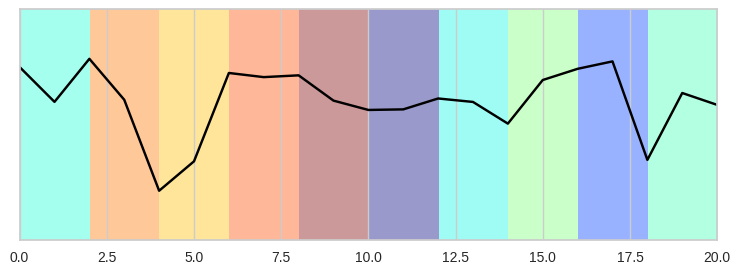

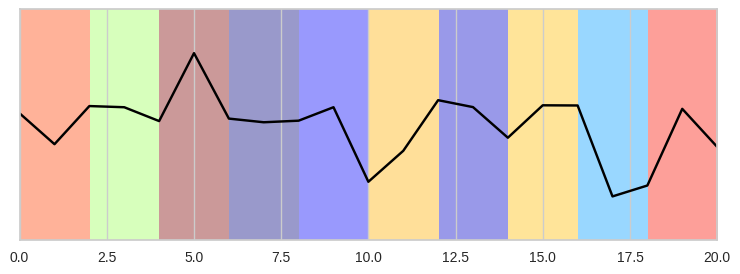

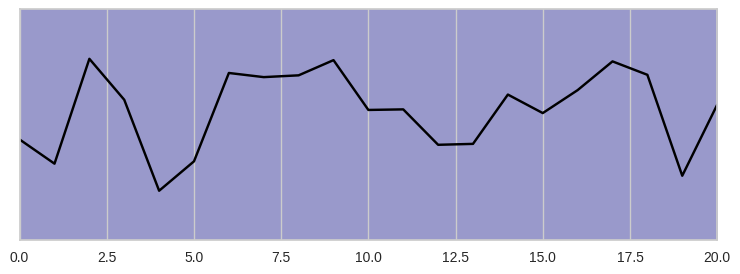

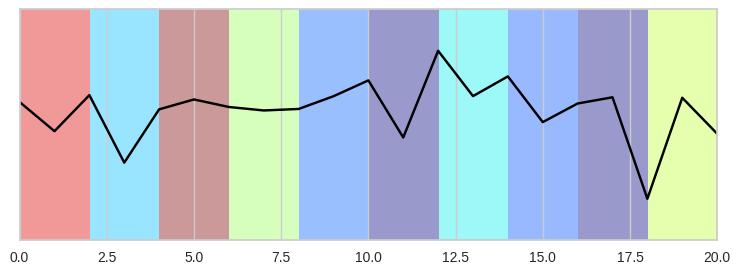

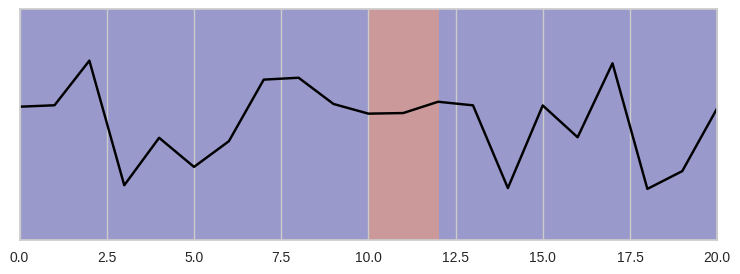

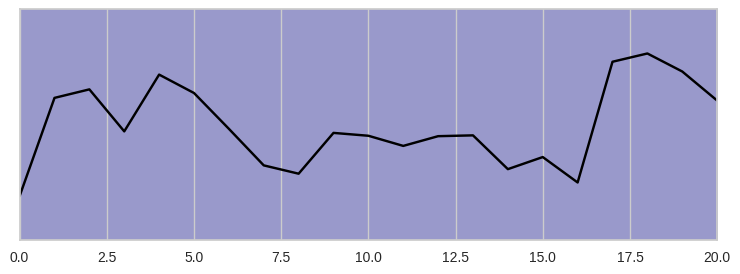

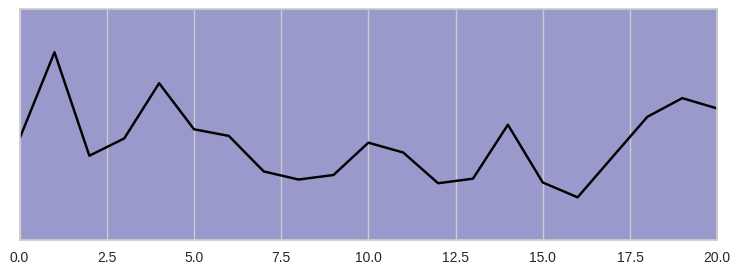

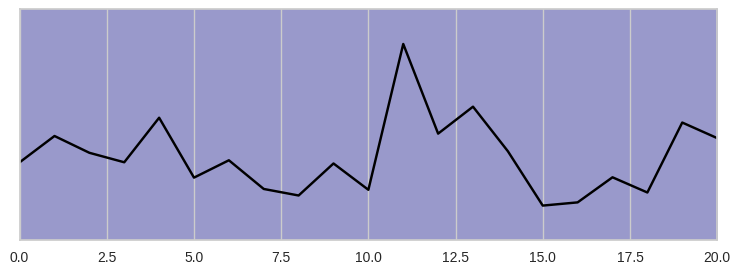

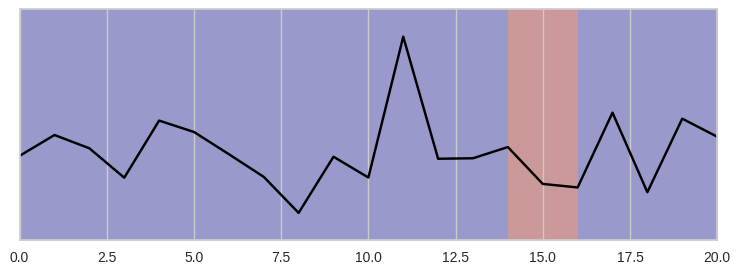

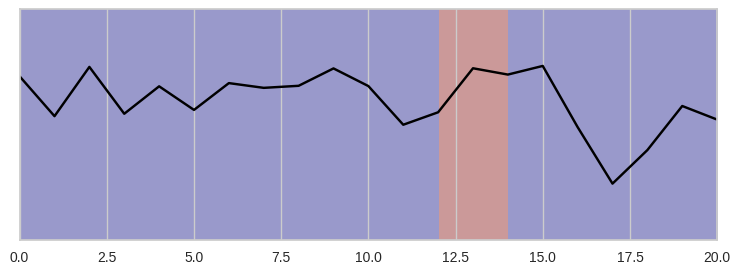

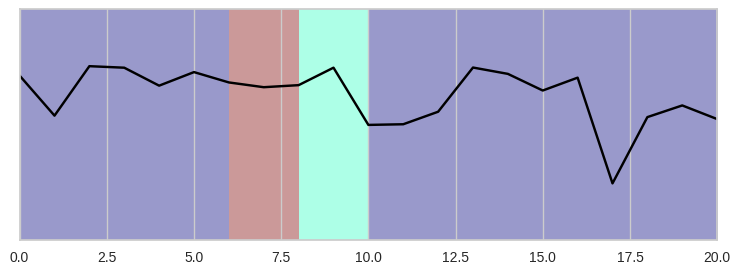

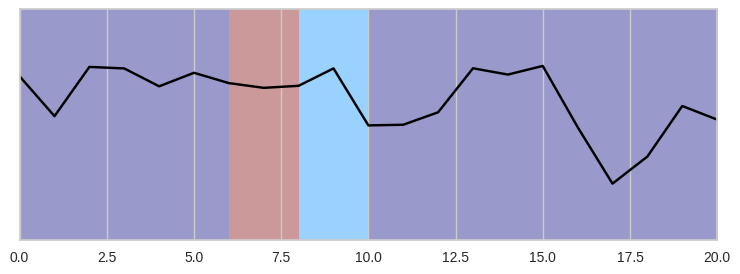

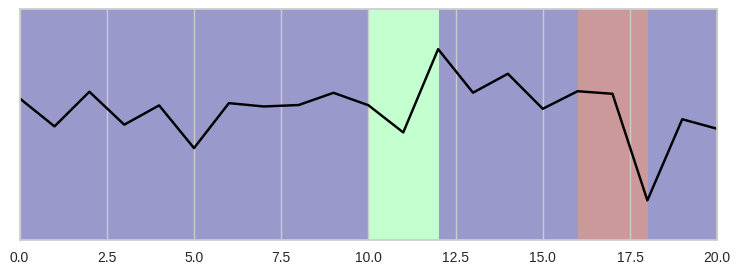

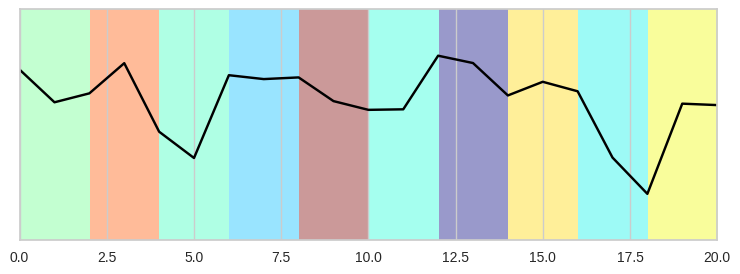

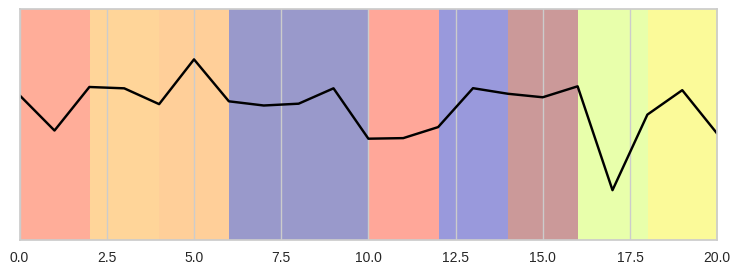

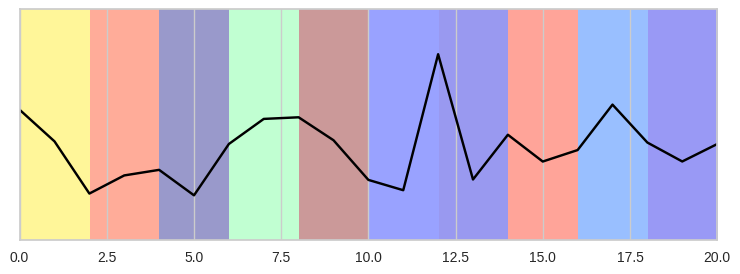

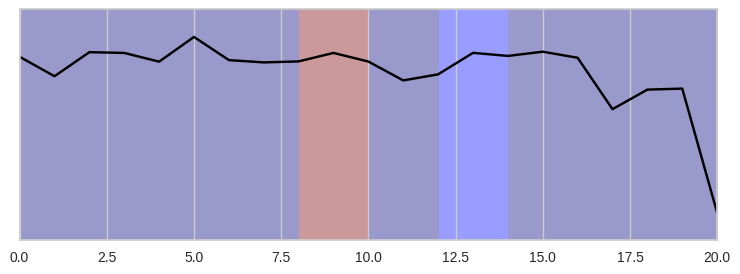

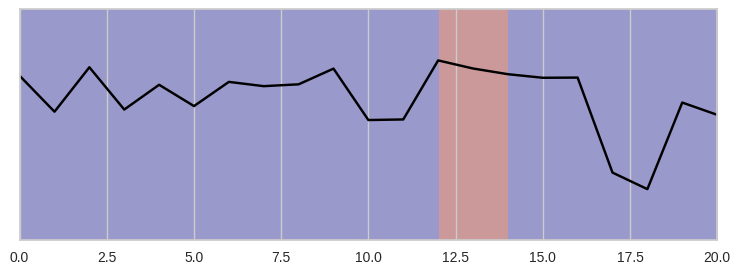

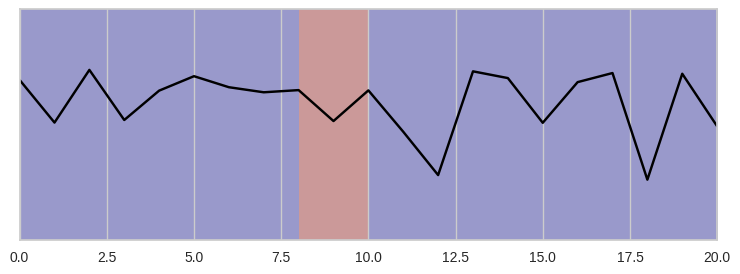

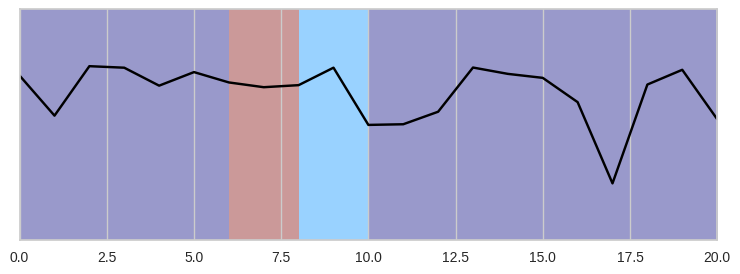

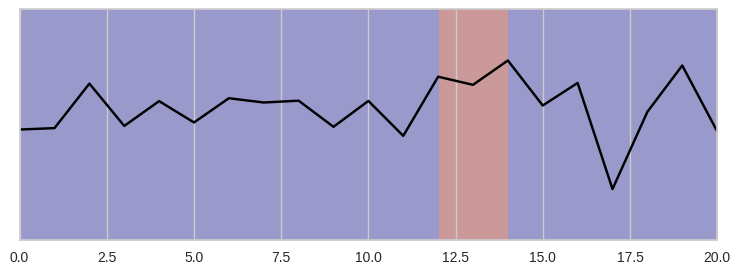

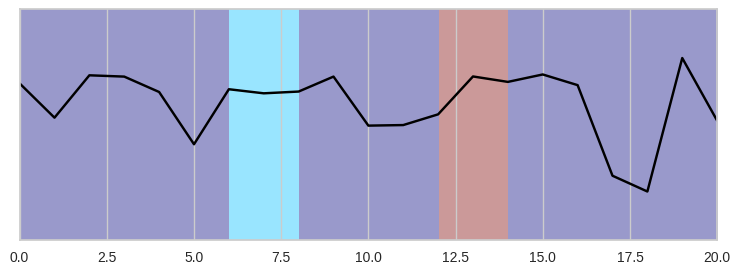

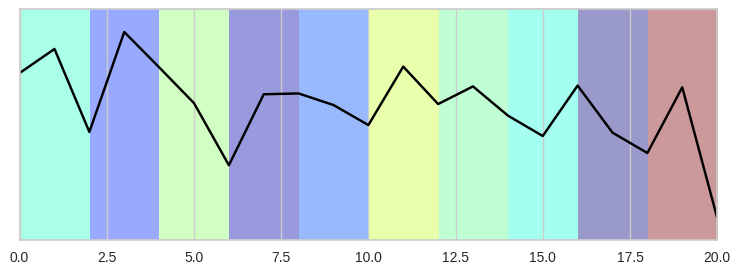

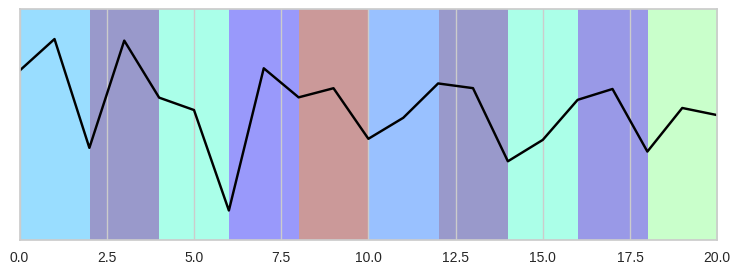

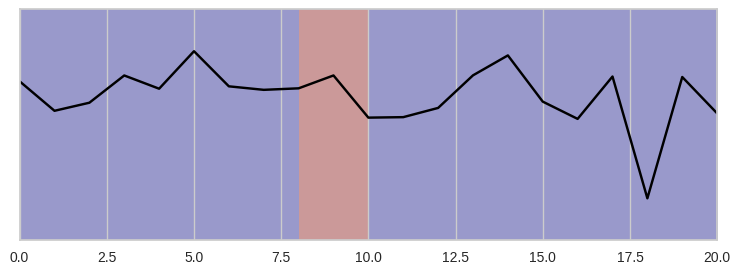

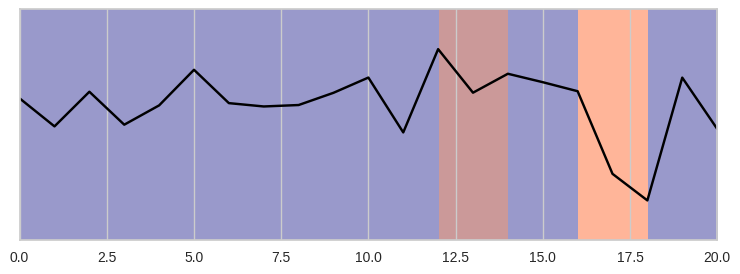

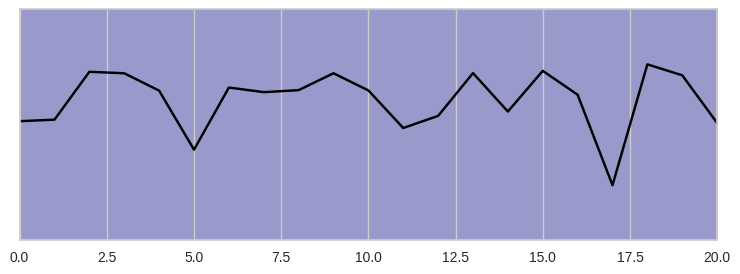

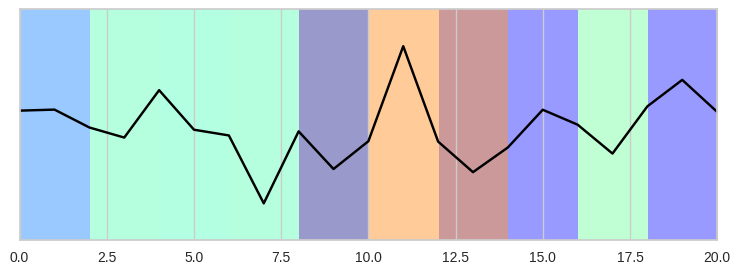

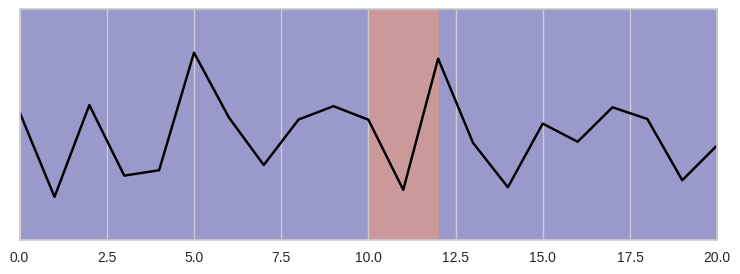

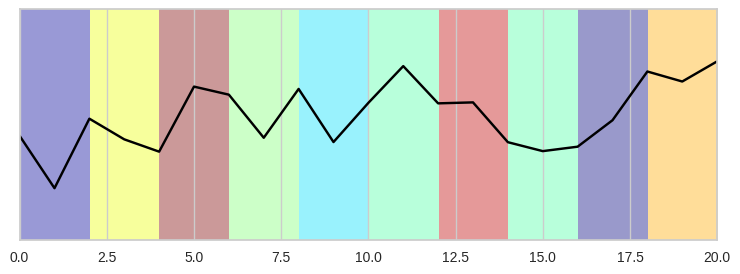

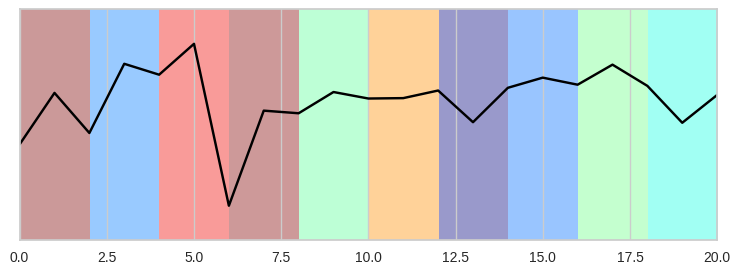

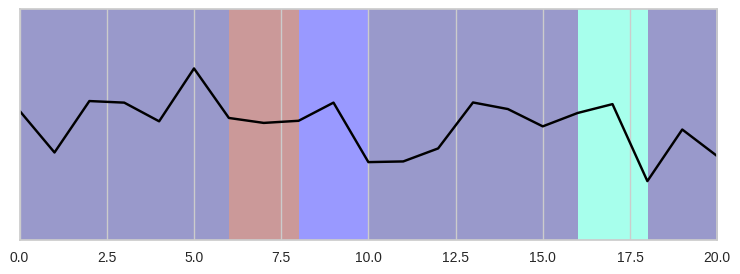

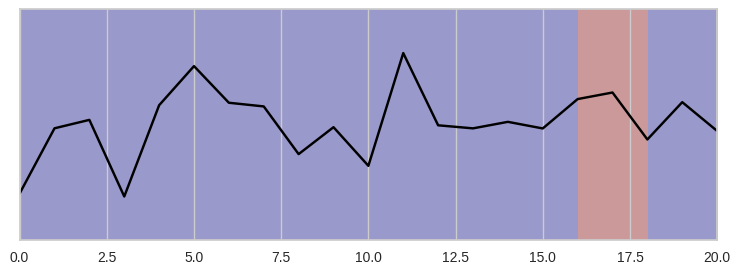

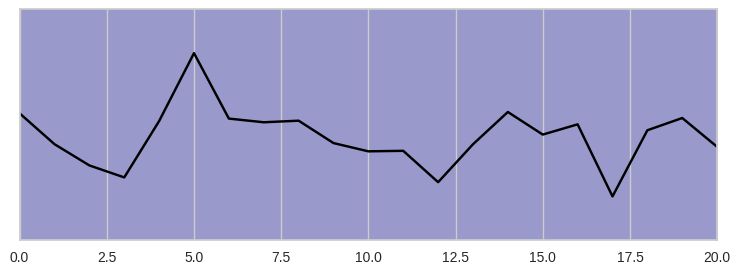

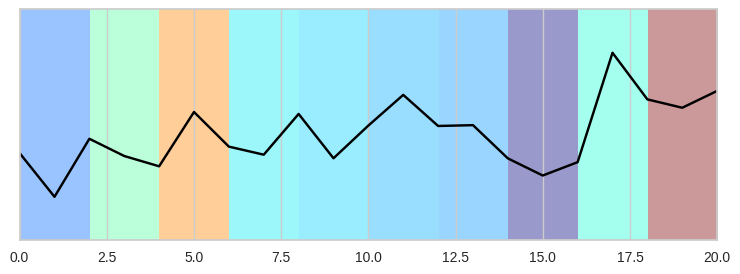

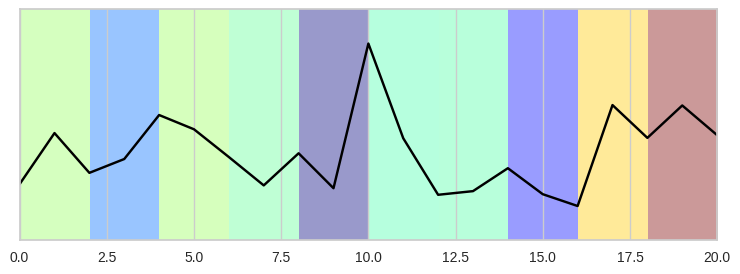

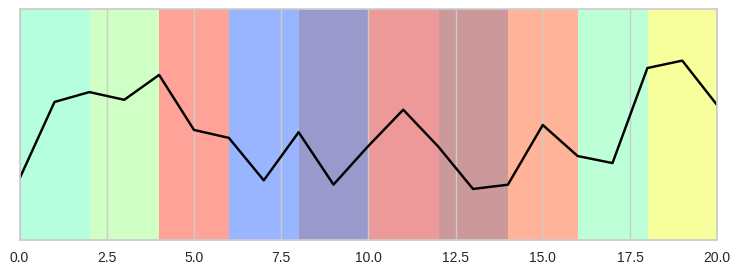

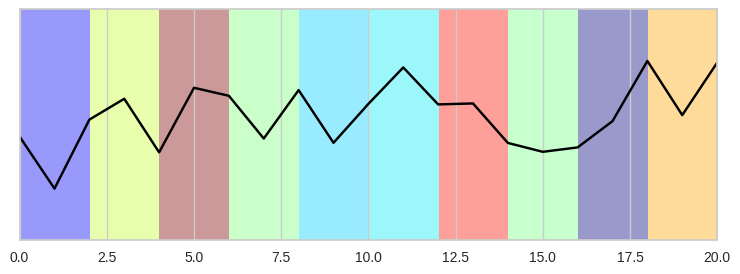

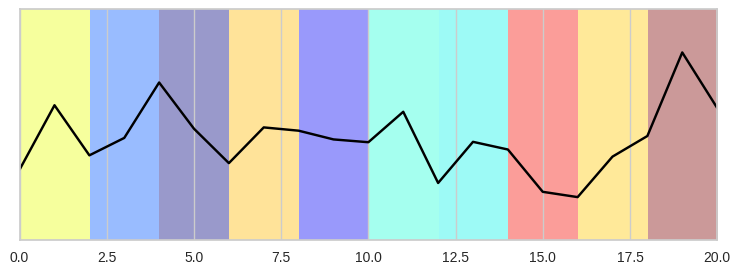

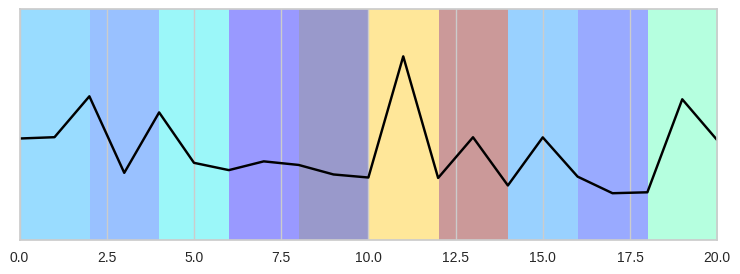

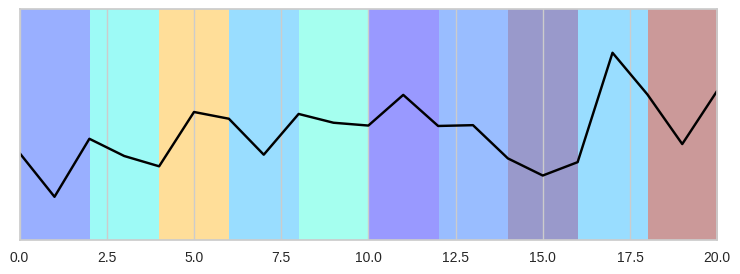

AD Imágenes - Shape: (35, 224, 224, 128)
AD Datos Planos - Shape: (35, 1, 10)


In [ ]:
def compute_gradcam_for_class(images, flat_features, model, last_conv_layer_name, modality='image'):
    """
    Compute Grad-CAM heatmaps para ambas modalidades (imágenes y datos planos).

    Parámetros:
    - images (np.array): Array de imágenes (modalidad A).
    - flat_features (np.array): Array de datos planos (modalidad B).
    - model (tf.keras.Model): Modelo entrenado bimodal.
    - last_conv_layer_name (str): Nombre de la capa convolucional objetivo.
    - modality (str): 'image' para la rama de imágenes, 'data' para la rama de datos planos.

    Retorna:
    - np.array: Heatmaps generados.
    """
    gradcam_results = []

    for img, flat in zip(images, flat_features):
        # Expandir dimensiones para batch size
        img_array = np.expand_dims(img, axis=0)
        flat_array = np.expand_dims(flat, axis=0)

        if modality == 'image':
            heatmap = make_gradcam_heatmap((flat_array, img_array), model, last_conv_layer_name)
            resized_heatmap = get_resized_heatmap(heatmap, img.shape)
            gradcam_results.append(resized_heatmap)

        elif modality == 'data':
            heatmap_1d = gradcam1D(last_conv_layer_name, (flat_array, img_array), "ClaseX", model, "/content/")
            gradcam_results.append(heatmap_1d)

    return np.array(gradcam_results)

# Capas convolucionales finales para cada rama (¡Verifica con model.summary()!)
last_conv_image = 'conv2d_14'  # Capa final de la rama de imágenes
last_conv_data = 'conv1d_4'    # Capa final de la rama de datos planos

# Computar Grad-CAM para cada clase y modalidad
gradcam_AD_img = compute_gradcam_for_class(AD_eeg, AD_flat, model, last_conv_image, 'image')
gradcam_FTD_img = compute_gradcam_for_class(FTD_eeg, FTD_flat, model, last_conv_image, 'image')
gradcam_CN_img = compute_gradcam_for_class(CN_eeg, CN_flat, model, last_conv_image, 'image')

gradcam_AD_data = compute_gradcam_for_class(AD_eeg, AD_flat, model, last_conv_data, 'data')
gradcam_FTD_data = compute_gradcam_for_class(FTD_eeg, FTD_flat, model, last_conv_data, 'data')
gradcam_CN_data = compute_gradcam_for_class(CN_eeg, CN_flat, model, last_conv_data, 'data')

# Verificación de dimensiones
print(f'AD Imágenes - Shape: {gradcam_AD_img.shape}')
print(f'AD Datos Planos - Shape: {gradcam_AD_data.shape}')

In [ ]:
# Compute the average Grad-CAM for each class
gradcam_AD_avg = np.mean(gradcam_AD_img, axis=0)
gradcam_BV_avg = np.mean(gradcam_FTD_img, axis=0)
gradcam_HC_avg = np.mean(gradcam_CN_img, axis=0)

# Verify the dimensions of the average Grad-CAM
print(f'AD Average Grad-CAM shape: {gradcam_AD_avg.shape}')
print(f'BV Average Grad-CAM shape: {gradcam_BV_avg.shape}')
print(f'HC Average Grad-CAM shape: {gradcam_HC_avg.shape}')

# Sum of pixel values for each layer in the average Grad-CAM for each class
sum_pixels_AD = np.sum(gradcam_AD_avg, axis=(0, 1))
sum_pixels_BV = np.sum(gradcam_BV_avg, axis=(0, 1))
sum_pixels_HC = np.sum(gradcam_HC_avg, axis=(0, 1))

# Find the layer with the highest pixel sum for each class
max_layer_AD = np.argmax(sum_pixels_AD)
max_layer_BV = np.argmax(sum_pixels_BV)
max_layer_HC = np.argmax(sum_pixels_HC)

# Visualization of the results
print(f'For AD, the layer with the highest pixel intensity is number: {max_layer_AD}')
print(f'For BV, the layer with the highest pixel intensity is number: {max_layer_BV}')
print(f'For HC, the layer with the highest pixel intensity is number: {max_layer_HC}')

AD Average Grad-CAM shape: (224, 224, 128)
BV Average Grad-CAM shape: (224, 224, 128)
HC Average Grad-CAM shape: (224, 224, 128)
For AD, the layer with the highest pixel intensity is number: 106
For BV, the layer with the highest pixel intensity is number: 117
For HC, the layer with the highest pixel intensity is number: 122


In [ ]:
# Compute the average Grad-CAM for each class
gradcam_AD_flat_avg = np.mean(gradcam_AD_data, axis=0)
gradcam_BV_flat_avg = np.mean(gradcam_FTD_data, axis=0)
gradcam_HC_flat_avg = np.mean(gradcam_CN_data, axis=0)

In [ ]:
gradcam_AD_flat_avg.shape

(1, 10)

In [ ]:
AD_flat_avg=np.mean(AD_flat, axis=0)
BV_flat_avg=np.mean(FTD_flat, axis=0)
HC_flat_avg=np.mean(CN_flat, axis=0)

In [ ]:
AD_flat_avg.shape

(21,)

Shape después de interpolar: (21,)


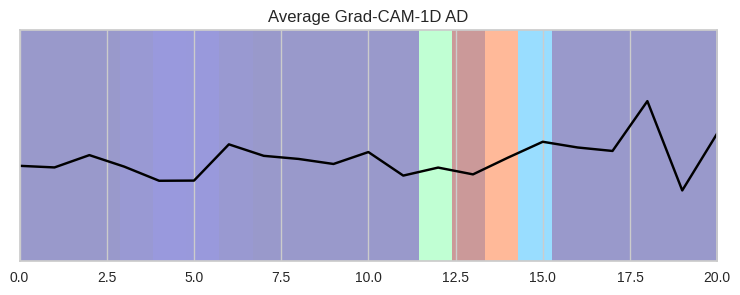

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d  # Para ajustar dimensiones

# Calcular Grad-CAM promedio por clase
gradcam_AD_flat_avg = np.mean(gradcam_AD_data, axis=0)  # (1, 10)
gradcam_AD_flat_avg = gradcam_AD_flat_avg.squeeze()  # Convertir a (10,)

# Calcular datos clínicos promedio
AD_flat_avg = np.mean(AD_flat, axis=0)  # (21,)

# Interpolación para ajustar dimensiones
x_original = np.linspace(0, 1, len(gradcam_AD_flat_avg))  # 10 puntos
x_nuevo = np.linspace(0, 1, len(AD_flat_avg))  # 21 puntos
interp_func = interp1d(x_original, gradcam_AD_flat_avg, kind="linear")
gradcam_AD_flat_resized = interp_func(x_nuevo)  # Ahora tiene 21 puntos

# Verificar dimensiones
print(f"Shape después de interpolar: {gradcam_AD_flat_resized.shape}")

# Visualización corregida
plt.figure(figsize=(9, 3))
plt.plot(AD_flat_avg, color='black', label="Datos clínicos promedio")

plt.imshow(gradcam_AD_flat_resized[np.newaxis, :], alpha=0.4, cmap='jet', aspect="auto",
           extent=[0, len(AD_flat_avg)-1, np.min(AD_flat_avg)-1, np.max(AD_flat_avg)+1])

plt.yticks([])
plt.ylim(np.min(AD_flat_avg)-1, np.max(AD_flat_avg)+1)
plt.title("Average Grad-CAM-1D AD")
plt.show()


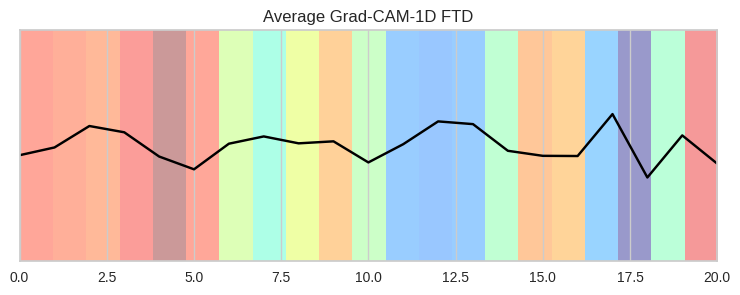

In [ ]:
# Calcular Grad-CAM promedio para FTD
gradcam_FTD_flat_avg = np.mean(gradcam_FTD_data, axis=0)  # (1, 10)
gradcam_FTD_flat_avg = gradcam_FTD_flat_avg.squeeze()  # Convertir a (10,)

# Calcular datos clínicos promedio para FTD
BV_flat_avg = np.mean(FTD_flat, axis=0)  # (21,)

# Interpolación
x_original = np.linspace(0, 1, len(gradcam_FTD_flat_avg))  # 10 puntos
x_nuevo = np.linspace(0, 1, len(BV_flat_avg))  # 21 puntos
interp_func = interp1d(x_original, gradcam_FTD_flat_avg, kind="linear")
gradcam_FTD_flat_resized = interp_func(x_nuevo)  # Ahora tiene 21 puntos

# Visualización
plt.figure(figsize=(9, 3))
plt.plot(BV_flat_avg, color='black', label="Datos clínicos promedio")

plt.imshow(gradcam_FTD_flat_resized[np.newaxis, :], alpha=0.4, cmap='jet', aspect="auto",
           extent=[0, len(BV_flat_avg)-1, np.min(BV_flat_avg)-1, np.max(BV_flat_avg)+1])

plt.yticks([])
plt.ylim(np.min(BV_flat_avg)-1, np.max(BV_flat_avg)+1)
plt.title("Average Grad-CAM-1D FTD")
plt.show()


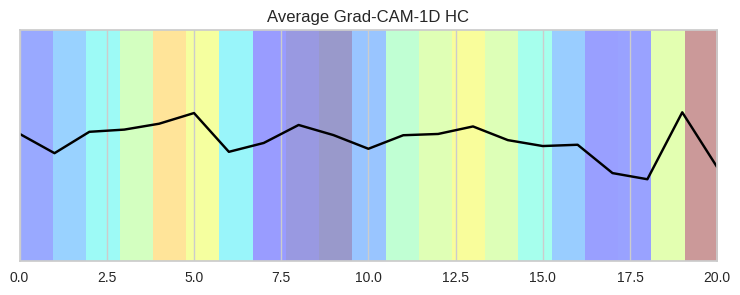

In [ ]:
# Calcular Grad-CAM promedio para CN
gradcam_CN_flat_avg = np.mean(gradcam_CN_data, axis=0)  # (1, 10)
gradcam_CN_flat_avg = gradcam_CN_flat_avg.squeeze()  # Convertir a (10,)

# Calcular datos clínicos promedio para CN
HC_flat_avg = np.mean(CN_flat, axis=0)  # (21,)

# Interpolación
x_original = np.linspace(0, 1, len(gradcam_CN_flat_avg))  # 10 puntos
x_nuevo = np.linspace(0, 1, len(HC_flat_avg))  # 21 puntos
interp_func = interp1d(x_original, gradcam_CN_flat_avg, kind="linear")
gradcam_CN_flat_resized = interp_func(x_nuevo)  # Ahora tiene 21 puntos

# Visualización
plt.figure(figsize=(9, 3))
plt.plot(HC_flat_avg, color='black', label="Datos clínicos promedio")

plt.imshow(gradcam_CN_flat_resized[np.newaxis, :], alpha=0.4, cmap='jet', aspect="auto",
           extent=[0, len(HC_flat_avg)-1, np.min(HC_flat_avg)-1, np.max(HC_flat_avg)+1])

plt.yticks([])
plt.ylim(np.min(HC_flat_avg)-1, np.max(HC_flat_avg)+1)
plt.title("Average Grad-CAM-1D HC")
plt.show()


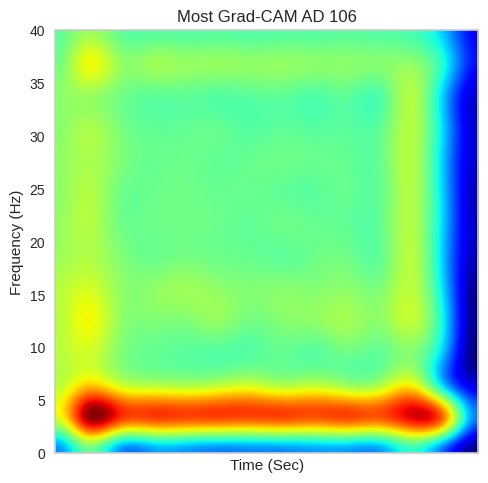

In [ ]:
y_range = (0, 40)
x_range = (0, 40)
plt.imshow(gradcam_AD_avg[:,:,max_layer_AD], cmap='jet', extent=[x_range[0], x_range[1],y_range[0], y_range[1]])
plt.xlabel('Time (Sec)')
plt.ylabel('Frequency (Hz)')
plt.xlim(x_range)
plt.ylim(y_range)
plt.grid(False)
plt.xticks([])
plt.title(f'Most Grad-CAM AD {max_layer_AD}')
plt.show()

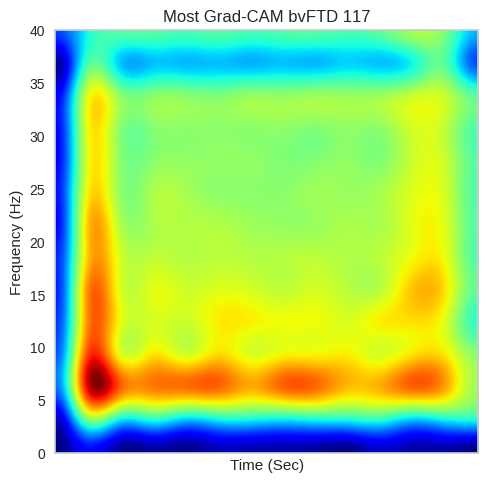

In [ ]:
y_range = (0, 40)
x_range = (0, 40)
plt.imshow(gradcam_BV_avg[:,:,max_layer_BV], cmap='jet', extent=[x_range[0], x_range[1],y_range[0], y_range[1]])
plt.xlabel('Time (Sec)')
plt.ylabel('Frequency (Hz)')
plt.xlim(x_range)
plt.ylim(y_range)
plt.grid(False)
plt.xticks([])
plt.title(f'Most Grad-CAM bvFTD {max_layer_BV}')
plt.show()

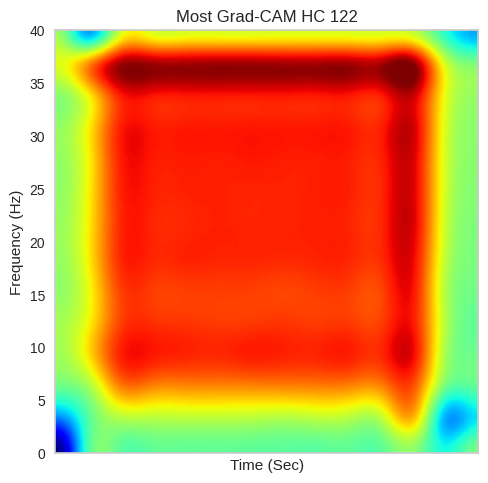

In [ ]:
y_range = (0, 40)
x_range = (0, 40)
plt.imshow(gradcam_HC_avg[:, :, max_layer_HC], cmap='jet', extent=[x_range[0], x_range[1],y_range[0], y_range[1]])
plt.xlabel('Time (Sec)')
plt.ylabel('Frequency (Hz)')
plt.xlim(x_range)
plt.ylim(y_range)
plt.grid(False)
plt.xticks([])
plt.title(f'Most Grad-CAM HC {max_layer_HC}')
plt.show()

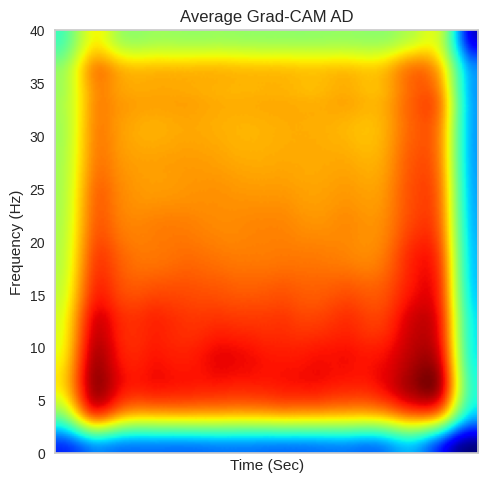

In [ ]:
summed_gradcam = np.sum(gradcam_AD_avg, axis=2)
# Divide the resulting image by 128 to obtain the average.
average_gradcam = summed_gradcam / 128

# Verification of the dimensions of the resulting image
assert average_gradcam.shape == (224, 224), "The average image dimension does not match the expected one"
y_range = (0, 40)
x_range = (0, 40)
plt.imshow(average_gradcam, cmap='jet', extent=[x_range[0], x_range[1],y_range[0], y_range[1]])
plt.xlabel('Time (Sec)')
plt.ylabel('Frequency (Hz)')
plt.xlim(x_range)
plt.ylim(y_range)
plt.grid(False)
plt.xticks([])
plt.title('Average Grad-CAM AD')
plt.show()

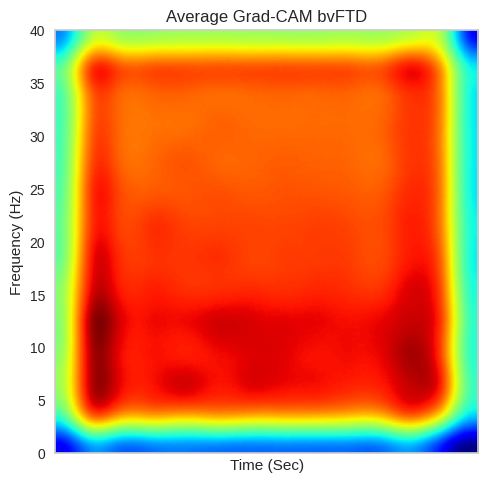

In [ ]:
summed_gradcam = np.sum(gradcam_BV_avg, axis=2)
# Divide the resulting image by 128 to obtain the average.
average_gradcam = summed_gradcam / 128

# Verification of the dimensions of the resulting image
y_range = (0, 40)
x_range = (0, 40)
plt.imshow(average_gradcam, cmap='jet', extent=[x_range[0], x_range[1],y_range[0], y_range[1]])
plt.xlabel('Time (Sec)')
plt.ylabel('Frequency (Hz)')
plt.xlim(x_range)
plt.ylim(y_range)
plt.grid(False)
plt.xticks([])
plt.title('Average Grad-CAM bvFTD')
plt.show()

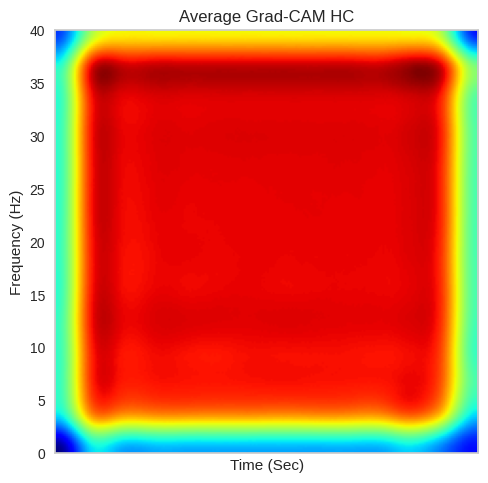

In [ ]:
summed_gradcam = np.sum(gradcam_HC_avg, axis=2)
# Divide the resulting image by 128 to obtain the average.
average_gradcam = summed_gradcam / 128

# Verification of the dimensions of the resulting image
y_range = (0, 40)
x_range = (0, 40)
plt.imshow(average_gradcam, cmap='jet', extent=[x_range[0], x_range[1],y_range[0], y_range[1]])
plt.xlabel('Time (Sec)')
plt.ylabel('Frequency (Hz)')
plt.xlim(x_range)
plt.ylim(y_range)
plt.grid(False)
plt.xticks([])
plt.title('Average Grad-CAM HC')
plt.show()

# XAI Integrated Gradients: Attributs for each input

## IG

In [ ]:
# @title attributs for each input
import tensorflow as tf

def interpolate_inputs(baseline_B, baseline_A, real_B, real_A, alpha):
    """
    Devuelve la interpolación lineal entre baseline y real, para un valor alpha en [0,1].
    baseline_B, real_B => input_B   (ej. shape (1, feat_dim))
    baseline_A, real_A => input_A   (ej. shape (1, 224,224,128))
    """
    interpolated_B = baseline_B + alpha * (real_B - baseline_B)
    interpolated_A = baseline_A + alpha * (real_A - baseline_A)
    return interpolated_B, interpolated_A


def get_target_output(model, x_B, x_A, target_class=None):
    preds = model([x_B, x_A], training=False)  # (batch_size, num_classes)

    if target_class is None:
        pred_classes = tf.math.argmax(preds, axis=-1)
        target_class = pred_classes[0]  # escalar tf.int32
        #print(f"Preds: {preds.numpy()}, Target class: {target_class.numpy()}")  # Imprime preds y target

    return preds[0, target_class]




def integrated_gradients_bimodal(
    model,
    real_B,
    real_A,
    baseline_B=None,
    baseline_A=None,
    target_class=None,
    m_steps=50
):
    """
    Calcula las atribuciones de Integrated Gradients para un modelo con dos inputs:
    - model => tu modelo Keras
    - real_B => tf.Tensor con la entrada real de la modalidad B (ej. shape (1, feats))
    - real_A => tf.Tensor con la entrada real de la modalidad A (ej. shape (1,224,224,128))
    - baseline_B => baseline para B. Si None, se define tf.zeros_like(real_B)
    - baseline_A => baseline para A. Si None, se define tf.zeros_like(real_A)
    - target_class => índice de clase a explicar. Si None, se toma la clase argmax.
    - m_steps => número de subdivisiones en la integración

    Return:
      ig_B, ig_A => Tensores con las atribuciones IG de cada modalidad,
                    con mismas shapes que real_B, real_A.
    """
    if baseline_B is None:
        baseline_B = tf.zeros_like(real_B)
    if baseline_A is None:
        baseline_A = tf.zeros_like(real_A)

    # Acumuladores de gradiente
    acc_grad_B = tf.zeros_like(real_B, dtype=tf.float32)
    acc_grad_A = tf.zeros_like(real_A, dtype=tf.float32)

    # Iteramos en alpha desde 0 hasta 1
    alphas = tf.linspace(0.0, 1.0, m_steps)
    for alpha in alphas:
        # 1) Interpolamos
        inter_B, inter_A = interpolate_inputs(baseline_B, baseline_A, real_B, real_A, alpha)

        # 2) Calculamos gradientes con GradientTape
        with tf.GradientTape() as tape:
            tape.watch([inter_B, inter_A])
            # Forward pass -> sacamos logit/prob objetivo
            out = get_target_output(model, inter_B, inter_A, target_class=target_class)
        grads = tape.gradient(out, [inter_B, inter_A])
        acc_grad_B += grads[0]
        acc_grad_A += grads[1]

    # 3) Promediamos gradientes
    avg_grad_B = acc_grad_B / tf.cast(m_steps, tf.float32)
    avg_grad_A = acc_grad_A / tf.cast(m_steps, tf.float32)

    # 4) (input - baseline)
    input_diff_B = real_B - baseline_B
    input_diff_A = real_A - baseline_A

    # 5) IG = (input - baseline) * promedio_grad
    ig_B = input_diff_B * avg_grad_B
    ig_A = input_diff_A * avg_grad_A

    return ig_B, ig_A

In [ ]:
# # Asegúrate de castear cada entrada a float32
# input_A = np.expand_dims(AD_eeg[0], axis=0).astype(np.float32)
# # input_A -> (1, 224,224,128)

# input_B = np.expand_dims(AD_flat[0], axis=0).astype(np.float32)
# # input_B -> (1, flat_features.shape[1], 1)

# # Verificar shapes
# print("input_A shape =", input_A.shape)  # Debería ser (1, features, 1)
# print("input_B shape =", input_B.shape)  # Debería ser (1, 224,224,128)
# # Integrated Gradients
# target_class = None
# ig_B, ig_A = integrated_gradients_bimodal(
#     model=model,
#     real_B=input_B,  # vector tabular
#     real_A=input_A,  # imagen STFT
#     baseline_B=None,
#     baseline_A=None,
#     target_class=target_class,
#     m_steps=50
# )

# print("IG para modalidad B (tabular) shape =", ig_B.shape)
# print("IG para modalidad A (imagen) shape =", ig_A.shape)

# # (Opcional) Magnitud total por modalidad
# contrib_B = tf.reduce_sum(tf.abs(ig_B))
# contrib_A = tf.reduce_sum(tf.abs(ig_A))
# print("Contrib. B (tabular) =", contrib_B.numpy())
# print("Contrib. A (imagen) =", contrib_A.numpy())

In [ ]:
# @title tabular contributions
def plot_tabular_contributions(ig_B, feature_names=None):
    """
    Dibuja un barplot de las atribuciones de IG para datos tabulares.

    ig_B: tf.Tensor con shape (1, num_features)
    feature_names: lista de nombres para cada feature (opcional).
    """
    # 1) Convertimos a numpy y quitamos la dimensión de batch
    ig_values = ig_B[0].numpy()  # shape (21,)

    # 2) Usar valor absoluto (si te interesa ver 'magnitud' de la contribución)
    ig_abs = np.abs(ig_values)

    # 3) Generar el eje X (una barra por feature)
    x = np.arange(len(ig_abs))

    plt.figure(figsize=(10, 5))
    plt.bar(x, ig_abs, color='steelblue')

    if feature_names is not None and len(feature_names) == len(ig_abs):
        plt.xticks(x, feature_names, rotation=90)
    else:
        plt.xticks(x, [f"feat_{i}" for i in range(len(ig_abs))])

    plt.ylabel("IG absolute value")
    plt.title("Atribuciones IG - Datos Tabulares")
    plt.tight_layout()
    plt.show()

In [ ]:
# Ejemplo de uso, asumiendo que ya has calculado ig_B:
# plot_tabular_contributions(ig_B, feature_names=features.columns.to_list())

In [ ]:
# @title image contributions
import matplotlib.cm as cm
def compute_ig_mask(ig_A, eps=1e-8):
    """
    Suma la magnitud de IG a lo largo del canal y normaliza [0,1].
    ig_A: tf.Tensor shape (1, H, W, C)
    return: numpy array shape (H, W) con valores en [0,1].
    """
    # 1) tomamos valor absoluto
    ig_abs = tf.abs(ig_A)
    # 2) sumamos sobre el eje -1 (canales)
    mask_2d = tf.reduce_sum(ig_abs, axis=-1)  # shape (1, H, W)
    # 3) quitamos la dimensión de batch
    mask_2d = mask_2d[0].numpy()  # shape (H, W)
    # 4) normalizar entre 0 y 1
    mask_2d -= mask_2d.min()
    mask_2d /= (mask_2d.max() + eps)
    return mask_2d

def plot_image_attribution(stft_image, ig_mask, alpha=0.4, cmap=cm.inferno):
    """
    Muestra la imagen/stft original en escala de grises y superpone la máscara IG en color.
    stft_image: np.array shape (H, W) o (H, W, 1)  (tu STFT en 1 canal, por ejemplo)
    ig_mask:    np.array shape (H, W) con valores en [0,1].
    """
    fig, ax = plt.subplots(1, 2, figsize=(10,5))

    # Vista 1: la STFT "cruda"
    ax[0].imshow(stft_image, cmap='viridis')
    ax[0].set_title("Original STFT")
    ax[0].axis("off")

    # Vista 2: STFT + heatmap superpuesto
    ax[1].imshow(stft_image, cmap='viridis')
    ax[1].imshow(ig_mask, cmap='Dark2', alpha=alpha)
    ax[1].set_title("IG Overlay")
    ax[1].axis("off")

    plt.tight_layout()
    plt.show()

In [ ]:
# # 1) Genera la máscara
# mask = compute_ig_mask(ig_A)  # (224,224)

# # 2) Muestra la superposición
# #    Necesitas la STFT original (sin batch). Asume shape (224,224) p.ej.
# stft_original = AD_eeg[0]  # shape (224,224,128)?
# # Si tu "imagen" es (224,224,128), para visualizar en grayscale normal
# # tal vez hagas un sum/mean por el canal. Por ejemplo:
# stft_grayscale = np.mean(stft_original, axis=-1)  # shape (224,224)

# plot_image_attribution(stft_grayscale, mask, alpha=0.4, cmap=cm.inferno)

In [ ]:
# @title for each chanel
import matplotlib.cm as cm
def compute_ig_mask_for_channel(ig_A, channel_index, eps=1e-8):
    """
    Devuelve la máscara IG de un solo canal.
    - ig_A: tf.Tensor shape (1, H, W, C)
    - channel_index: canal específico a visualizar
    return: np.array shape (H, W) con valores normalizados entre [0,1].
    """
    # Extrae ese canal del batch (batch=1), resultando shape (H, W)
    ig_slice = ig_A[0, :, :, channel_index].numpy()
    # Tomamos el valor absoluto (opcional, pero habitual en interpretabilidad)
    ig_slice_abs = np.abs(ig_slice)

    # Normalizar [0,1] para poder superponer con la imagen
    ig_slice_abs -= ig_slice_abs.min()
    denom = ig_slice_abs.max() + eps
    ig_slice_abs /= denom

    return ig_slice_abs

def plot_image_channel_attribution(stft_3d, ig_4d, channel_index=0,
                                   alpha=1, cmap=cm.inferno):
    """
    Muestra la STFT y su IG únicamente para un canal dado.
    stft_3d: np.array shape (H, W, C)
    ig_4d:   tf.Tensor shape (1, H, W, C)
    channel_index: canal específico a visualizar
    """
    # 1) Extraer canal de la STFT
    stft_slice = stft_3d[:, :, channel_index]  # (H, W)

    # 2) Obtener la IG normalizada para ese canal
    ig_mask = compute_ig_mask_for_channel(ig_4d, channel_index)
    # shape (H, W)

    # 3) Visualizamos con matplotlib
    fig, ax = plt.subplots(1, 2, figsize=(10,5))

    # Vista 1: el canal crudo de la STFT
    ax[0].imshow(stft_slice, cmap='viridis')
    ax[0].set_title(f"STFT canal {channel_index}")
    ax[0].axis("off")

    # Vista 2: STFT + heatmap
    ax[1].imshow(stft_slice, cmap='viridis')
    ax[1].imshow(ig_mask, cmap='Reds', alpha=alpha)
    ax[1].set_title(f"IG canal {channel_index}")
    ax[1].axis("off")

    plt.tight_layout()
    plt.show()


In [ ]:
# channel_index = 10
# plot_image_channel_attribution(
#     stft_3d=stft_original,
#     ig_4d=ig_A,
#     channel_index=channel_index,
#     alpha=1,
#     cmap=cm.inferno
# )

## IG promedio

In [ ]:
# @title average ig
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.cm as cm

def compute_average_ig(model, data_tabular, data_images, target_class, m_steps=50):
    """
    Calcula el promedio de IG en una clase específica.

    Parámetros:
    - model: el modelo Keras bimodal entrenado.
    - data_tabular: np.array con datos tabulares de la clase (N, num_features).
    - data_images: np.array con imágenes STFT de la clase (N, H, W, C).
    - target_class: int, la clase objetivo para calcular IG.
    - m_steps: número de pasos de interpolación en IG (mayor = más preciso, pero más lento).

    Retorna:
    - avg_ig_B: np.array con IG promedio de la modalidad tabular (num_features,).
    - avg_ig_A: np.array con IG promedio de la modalidad imagen (H, W, C).
    """

    num_samples = len(data_tabular)  # Cantidad de pacientes en la clase
    assert len(data_images) == num_samples, "Las dimensiones de datos tabulares e imágenes no coinciden"

    # Inicializar acumuladores de IG
    acc_ig_B = np.zeros_like(data_tabular[0], dtype=np.float32)  # (num_features,)
    acc_ig_A = np.zeros_like(data_images[0], dtype=np.float32)   # (H, W, C)

    for i in range(num_samples):
        # Obtener inputs individuales y castear a float32
        input_B = np.expand_dims(data_images[i], axis=0).astype(np.float32)  # (1, H, W, C)
        input_A = np.expand_dims(data_tabular[i], axis=0).astype(np.float32)  # (1, num_features)

        # Calcular IG para el paciente i
        ig_B, ig_A = integrated_gradients_bimodal(
            model=model,
            real_B=input_A,
            real_A=input_B,
            baseline_B=None,
            baseline_A=None,
            target_class=target_class,
            m_steps=m_steps
        )

        # Acumular IG
        acc_ig_B += ig_B[0]  # (num_features,)
        acc_ig_A += ig_A[0]  # (H, W, C)

    # Promediar IG
    avg_ig_B = acc_ig_B / num_samples
    avg_ig_A = acc_ig_A / num_samples

    return avg_ig_B, avg_ig_A

In [ ]:
# @title plot average
def plot_average_tabular_contributions(avg_ig_B, feature_names=None):
    """
    Grafica el promedio de IG en datos tabulares como un barplot.

    Parámetros:
    - avg_ig_B: np.array con IG promedio (num_features,).
    - feature_names: lista opcional con nombres de features.
    """

    ig_abs = np.abs(avg_ig_B)  # Tomar valor absoluto
    x = np.arange(len(ig_abs))

    plt.figure(figsize=(10, 5))
    plt.bar(x, ig_abs, color='steelblue')

    if feature_names is not None and len(feature_names) == len(ig_abs):
        plt.xticks(x, feature_names, rotation=90)
    else:
        plt.xticks(x, [f"feat_{i}" for i in range(len(ig_abs))])

    plt.ylabel("Promedio IG (Valor Absoluto)")
    plt.title("Atribuciones IG Promedio - Datos Tabulares")
    plt.tight_layout()
    plt.show()

In [ ]:
# @title plot stft average
def plot_average_image_attribution(stft_image, avg_ig_A, alpha=0.4, cmap=cm.inferno):
    """
    Grafica la imagen STFT original y la máscara de IG promedio sobrepuesta.

    Parámetros:
    - stft_image: np.array (H, W) o (H, W, 1), imagen STFT original.
    - avg_ig_A: np.array (H, W, C), IG promedio en imágenes.
    - alpha: transparencia del overlay.
    - cmap: colormap para el overlay.
    """

    ig_mask = np.abs(avg_ig_A).sum(axis=-1)  # Sumar sobre los canales para obtener un mapa 2D
    ig_mask -= ig_mask.min()
    ig_mask /= (ig_mask.max() + 1e-8)  # Normalizar [0,1]

    fig, ax = plt.subplots(1, 2, figsize=(10,5))

    y_range = (0, 40)
    x_range = (0, 40)
    # Imagen original
    ax[0].imshow(stft_image, cmap='viridis', extent=[x_range[0], x_range[1],y_range[0], y_range[1]])
    ax[0].set_title("STFT Original")
    # ax[0].axis("off")
    ax[0].set_xlabel('Time (Sec)')
    ax[0].set_ylabel('Frequency (Hz)')
    ax[0].set_xlim(x_range)
    ax[0].set_ylim(y_range)
    ax[0].grid(False)
    ax[0].set_xticks([])
    # Superposición de IG
    # ax[1].imshow(stft_image, cmap='viridis')
    # ax[1].imshow(ig_mask, cmap=cmap, alpha=alpha)
    ax[1].imshow(ig_mask, extent=[x_range[0], x_range[1],y_range[0], y_range[1]])
    ax[1].set_title("IG Promedio Overlay")
    # ax[1].axis("off")
    ax[1].set_xlabel('Time (Sec)')
    ax[1].set_ylabel('Frequency (Hz)')
    ax[1].set_xlim(x_range)
    ax[1].set_ylim(y_range)
    ax[1].grid(False)
    ax[1].set_xticks([])

    plt.tight_layout()
    plt.show()

# plt.imshow(resized_heatmap[:,:,0], cmap='jet', extent=[x_range[0], x_range[1],y_range[0], y_range[1]])


In [ ]:
target_class = 1  #2 FTD, 1 CN, 0 AD
avg_ig_B, avg_ig_A = compute_average_ig(
    model=model,
    data_tabular=CN_flat,   # Datos tabulares de la clase AD
    data_images=CN_eeg,     # Imágenes STFT de la clase AD
    target_class=target_class,
    m_steps=50
)

In [ ]:
#promedio de contribucion Magnitud total por modalidad
contrib_B = tf.reduce_sum(tf.abs(avg_ig_B))
contrib_A = tf.reduce_sum(tf.abs(avg_ig_A))
print("Contrib. B (tabular) =", contrib_B.numpy())
print("Contrib. A (imagen) =", contrib_A.numpy())
#FTD

Contrib. B (tabular) = 0.16105302
Contrib. A (imagen) = 9.325803


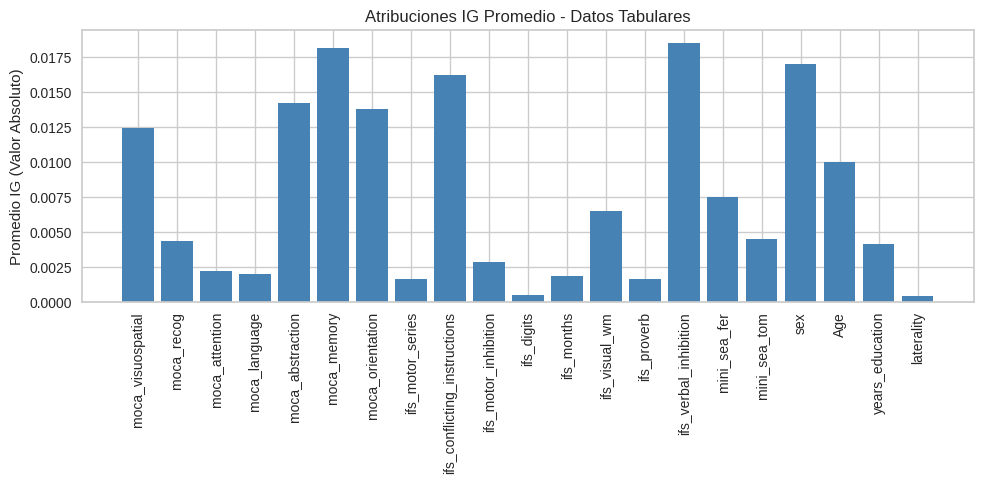

In [ ]:
plot_average_tabular_contributions(avg_ig_B, feature_names=features.columns.to_list())

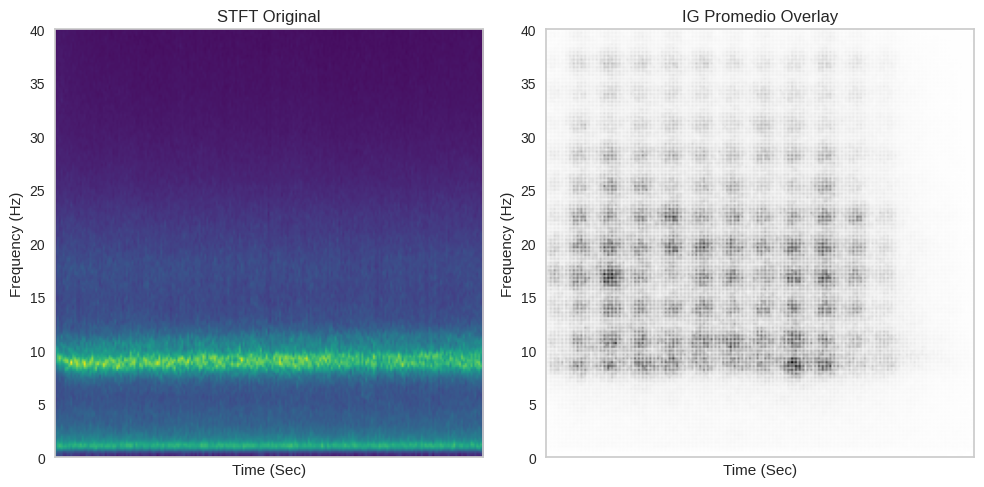

In [ ]:
# Tomar una STFT representativa de la clase (puede ser la media de todas)
stft_mean = np.mean(CN_eeg, axis=0)  # (H, W, C)
stft_grayscale = np.mean(stft_mean, axis=-1)  # (H, W)

plot_average_image_attribution(stft_grayscale, avg_ig_A, alpha=0.4, cmap=cm.inferno)

In [ ]:
target_class = 2  #2 FTD, 1 CN, 0 AD
avg_ig_B, avg_ig_A = compute_average_ig(
    model=model,
    data_tabular=FTD_flat,   # Datos tabulares de la clase AD
    data_images=FTD_eeg,     # Imágenes STFT de la clase AD
    target_class=target_class,
    m_steps=50
)

In [ ]:
#promedio de contribucion Magnitud total por modalidad
contrib_B = tf.reduce_sum(tf.abs(avg_ig_B))
contrib_A = tf.reduce_sum(tf.abs(avg_ig_A))
print("Contrib. B (tabular) =", contrib_B.numpy())
print("Contrib. A (imagen) =", contrib_A.numpy())
#FTD

Contrib. B (tabular) = 0.22802915
Contrib. A (imagen) = 26.154856


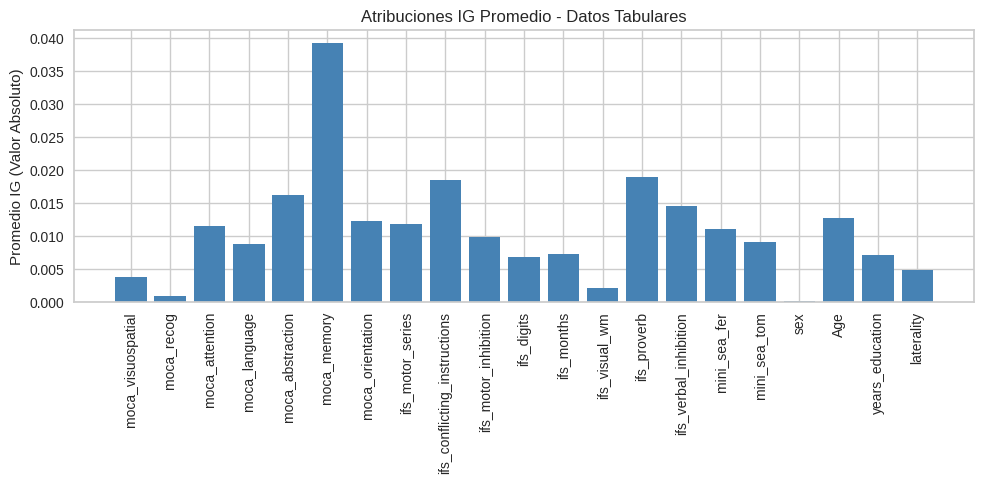

In [ ]:
plot_average_tabular_contributions(avg_ig_B, feature_names=features.columns.to_list())

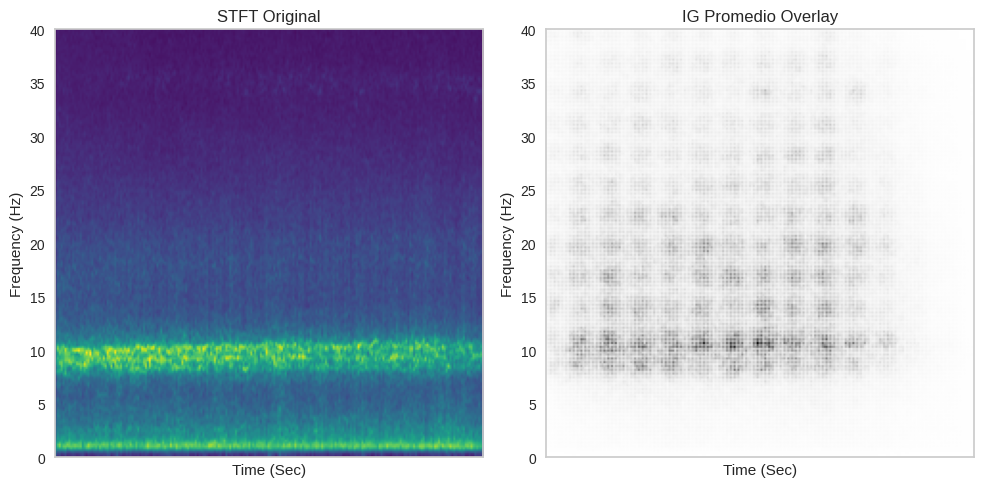

In [ ]:
# Tomar una STFT representativa de la clase (puede ser la media de todas)
stft_mean = np.mean(FTD_eeg, axis=0)  # (H, W, C)
stft_grayscale = np.mean(stft_mean, axis=-1)  # (H, W)

plot_average_image_attribution(stft_grayscale, avg_ig_A, alpha=0.4, cmap=cm.inferno)

In [ ]:
target_class = 0  #2 FTD, 1 CN, 0 AD
avg_ig_B, avg_ig_A = compute_average_ig(
    model=model,
    data_tabular=AD_flat,   # Datos tabulares de la clase AD
    data_images=AD_eeg,     # Imágenes STFT de la clase AD
    target_class=target_class,
    m_steps=50
)

In [ ]:
#promedio de contribucion Magnitud total por modalidad
contrib_B = tf.reduce_sum(tf.abs(avg_ig_B))
contrib_A = tf.reduce_sum(tf.abs(avg_ig_A))
print("Contrib. B (tabular) =", contrib_B.numpy())
print("Contrib. A (imagen) =", contrib_A.numpy())
#FTD

Contrib. B (tabular) = 0.08879035
Contrib. A (imagen) = 38.83753


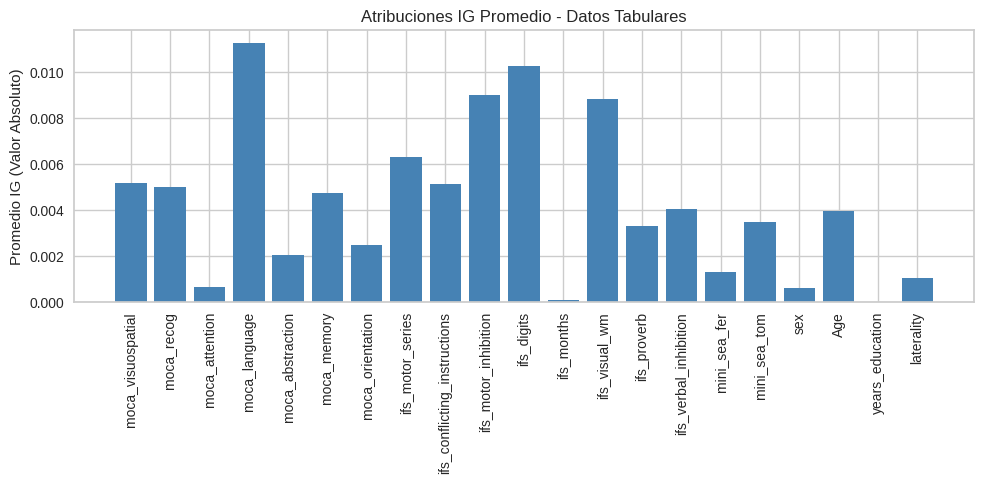

In [ ]:
plot_average_tabular_contributions(avg_ig_B, feature_names=features.columns.to_list())

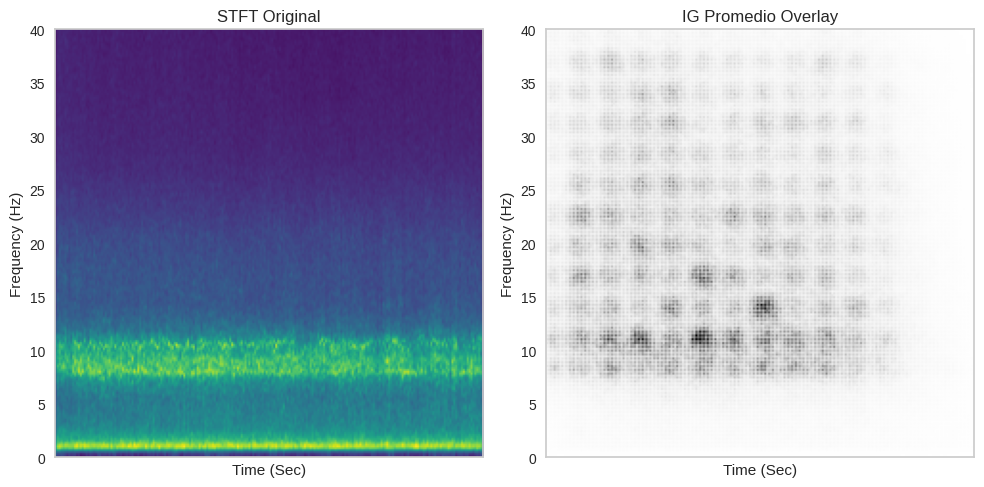

In [ ]:
# Tomar una STFT representativa de la clase (puede ser la media de todas)
stft_mean = np.mean(AD_eeg, axis=0)  # (H, W, C)
stft_grayscale = np.mean(stft_mean, axis=-1)  # (H, W)

plot_average_image_attribution(stft_grayscale, avg_ig_A, alpha=0.4, cmap=cm.inferno)

# XAI for attention mechanism and cross attention

## Modelo

### Funciones e hiperFunciones

In [ ]:
def squeeze_excitation_layer(input_layer, out_dim, ratio, conv):
  squeeze = tf.keras.layers.GlobalAveragePooling2D()(input_layer)
  excitation = tf.keras.layers.Dense(units=out_dim / ratio, activation='relu')(squeeze)
  excitation = tf.keras.layers.Dense(out_dim,activation='sigmoid')(excitation)
  excitation = tf.reshape(excitation, [-1,1,1,out_dim])
  scale = tf.keras.layers.multiply([input_layer, excitation])
  if conv:
    shortcut = tf.keras.layers.Conv2D(out_dim,kernel_size=1,strides=1,
                                      padding='same',kernel_initializer='he_normal')(input_layer)
    shortcut = tf.keras.layers.BatchNormalization()(shortcut)
  else:
    shortcut = input_layer
  out = tf.keras.layers.add([shortcut, scale])
  return out

def sreLu (input):
  return ReLU(negative_slope=0.1, threshold=0)(input)

def sConv(input,parameters,size,nstrides):
  return Conv2D(parameters, (size,size), strides=(nstrides,nstrides),padding="same", kernel_initializer='glorot_normal', kernel_regularizer=tf.keras.regularizers.l2(0.0001),bias_regularizer=tf.keras.regularizers.l2(0.0001))(input)

def sBN (input):
  return tf.keras.layers.BatchNormalization(momentum=0.2, epsilon=0.001, center=True, scale=True, trainable=True, fused=None, renorm=False, renorm_clipping=None, renorm_momentum=0.4, adjustment=None)(input)

def sGlobal_Avg_Pooling (input):
  return tf.keras.layers.GlobalAveragePooling2D()(input)

def sDense (input, n_units, activate_c):
  return tf.keras.layers.Dense(n_units,activation=activate_c)(input)

def smultiply (input_1, input_2):
  return tf.keras.layers.multiply([input_1, input_2])

def sadd (input_1, input_2):
  return tf.keras.layers.add([input_1, input_2])


initial_learning_rate = 0.001
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=100000, decay_rate=0.96, staircase=True
) #A la medida


### Bloques TF


In [ ]:
def Block_1 (input, parameter):
  output = sConv(input, parameter, 3, 1)
  output = sBN(output)
  output = sreLu(output)
  return output



def SE_Block(input, out_dim, ratio):
  output = sGlobal_Avg_Pooling(input)
  output = sDense(output, out_dim/ratio, 'relu')
  output = sDense(output, out_dim, 'sigmoid')
  return output



def Block_2 (input, parameter):
  output = Block_1(input, parameter)
  output = sConv(output, parameter, 3, 1)
  output = sBN(output)
  multiplier = SE_Block(output,  parameter, parameter)
  # output = smultiply(output, output)
  output = smultiply(multiplier, output)
  output = sadd(output, input)
  return output


from tensorflow.python.ops.gen_array_ops import shape

def Block_3 (input, parameter):
  addition = sConv(input, parameter, 1, 2)
  addition = sBN(addition)
  output = sConv(input, parameter, 3, 2)
  output = sBN(output)
  output = sreLu(output)
  output = sConv(output, parameter, 3, 1)
  output = sBN(output)
  multiplier = SE_Block(output,  parameter, parameter)
  output = smultiply(multiplier, output)
  output = sadd(output, addition)
  return output

def Block_4 (input, parameter):
  output = Block_1(input, parameter)
  output = sConv(input, parameter, 3, 1)
  output = sBN(output)

  return output


### Hiperparametros TF

In [ ]:
NUM_LAYERS = 16
#------------Projected_Patches-----------------
IMAGE_SIZE_2 =  13# We will resize input images to this size.
PATCH_SIZE_2 = 11  # Size of the patches to be extracted from the input images.
NUM_PATCHES_2 = (IMAGE_SIZE_2 // PATCH_SIZE_2) ** 2
print(NUM_PATCHES_2)
#------------Attention_Data----------------------
LAYER_NORM_EPS_1 = 1e-6
PROJECTION_DIM_1 = 128 # No se puede modificar
NUM_HEADS_1 = 16
MLP_UNITS_1 = [
    PROJECTION_DIM_1 * 2,
    PROJECTION_DIM_1
]
#------------Attention_Images------------------
LAYER_NORM_EPS_2 = 1e-6
PROJECTION_DIM_2 = 128
NUM_HEADS_2 = 16
MLP_UNITS_2 = [
    PROJECTION_DIM_2 * 2,
    PROJECTION_DIM_2
]
#---------Cross_Attention
NUM_HEADS_3 = 16
PROJECTION_DIM_3 = 128

1


### TF

In [ ]:
def position_embedding(projected_patches, num_patches=NUM_PATCHES_2, projection_dim=PROJECTION_DIM_2):
    # Build the positions.
    positions = tf.range(start=0, limit=num_patches, delta=1)
    # Encode the positions with an Embedding layer.
    encoded_positions = layers.Embedding(
        input_dim=num_patches, output_dim=projection_dim
    )(positions)
    # Add encoded positions to the projected patches.
    return projected_patches + encoded_positions

def mlp(x, dropout_rate, hidden_units):
    # Iterate over the hidden units and
    # add Dense => Dropout.
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x

@tf.keras.utils.register_keras_serializable()
class CrossAttention(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super().__init__()
        self.mha = tf.keras.layers.MultiHeadAttention(**kwargs)
        self.add = tf.keras.layers.Add()
        self.layernorm = tf.keras.layers.LayerNormalization()
        self.attention_scores = None  # Almacenará las atenciones como propiedad

    def call(self, x, y, **kwargs):
        attn, attention_scores = self.mha(
            query=x, value=y,
            return_attention_scores=True
        )
        self.attention_scores = attention_scores  # Guarda las atenciones
        x = self.add([x, attn])
        return self.layernorm(x), attention_scores  # Retorna salida y atenciones

In [ ]:
def Attention_Data(encoded_patches):
    x1 = layers.LayerNormalization(epsilon=LAYER_NORM_EPS_1)(encoded_patches)
    # Multi Head Self Attention layer 1.
    attention_output = layers.MultiHeadAttention(
        num_heads=NUM_HEADS_1, key_dim=PROJECTION_DIM_1, dropout=0.1
    )(x1, x1)
    # Skip connection 1.
    x2 = layers.Add()([attention_output, encoded_patches])
    # Layer normalization 2.
    x3 = layers.LayerNormalization(epsilon=LAYER_NORM_EPS_1)(x2)
    # MLP layer 1.
    x4 = mlp(x3, hidden_units=MLP_UNITS_1, dropout_rate=0.1)
    # Skip connection 2.
    encoded_patches_1 = layers.Add()([x4, x2])
    return encoded_patches_1

def Attention_Images(encoded_patches):
    x1 = layers.LayerNormalization(epsilon=LAYER_NORM_EPS_2)(encoded_patches)
    # Multi Head Self Attention layer 1.
    attention_output = layers.MultiHeadAttention(
        num_heads=NUM_HEADS_2, key_dim=PROJECTION_DIM_2, dropout=0.1
    )(x1, x1) #Dos atenciones, de datos planos y de imagenes
    #Seguida el cross atencion
    # Skip connection 1.
    x2 = layers.Add()([attention_output, encoded_patches])
    # Layer normalization 2.
    x3 = layers.LayerNormalization(epsilon=LAYER_NORM_EPS_2)(x2)
    # MLP layer 1.
    x4 = mlp(x3, hidden_units=MLP_UNITS_2, dropout_rate=0.1)
    # Skip connection 2.
    encoded_patches = layers.Add()([x4, x2])
    return encoded_patches #Despues de esto ahi si se manda al cross atention de cada una, un encoded patches de datos y un encoded patches de imagenes

def Transformer(inputs,layer): #layers,Dropout_1---imagen,datos
    # atencion al canal
    input = squeeze_excitation_layer(inputs, out_dim=512, ratio=32.0, conv=False)
    print(input.shape)
    projected_patches = layers.Conv2D(
          filters=PROJECTION_DIM_2,
          kernel_size=(PATCH_SIZE_2, PATCH_SIZE_2),
          strides=(PATCH_SIZE_2, PATCH_SIZE_2),
          padding="VALID",
      )(input)
    _, h, w, c = projected_patches.shape
    projected_patches = layers.Reshape((h * w, c))(
          projected_patches
      )  # (B, number_patches, projection_dim)
      # Add positional embeddings to the projected patches.
    encoded_patches = position_embedding(
          projected_patches
      )
    print(f'layer: {layer.shape}')
    print(f'encoded_patches: {encoded_patches.shape}')

    encoded_patches_2 = layers.Dropout(0.1)(encoded_patches)
    # Iterate over the number of layers and stack up blocks of
    # Transformer.
    encoded_patches_1 = layer
    # Atención cruzada
    cross_attention_layer = CrossAttention(num_heads=NUM_HEADS_3, key_dim=PROJECTION_DIM_3)
    attention_scores_list = []  # Lista para almacenar atenciones
    for i in range(NUM_LAYERS):
        encoded_patches_1 = Attention_Data(encoded_patches_1)
        encoded_patches_2 = Attention_Images(encoded_patches_2)
        attn_1_to_2, attn_scores_1 = cross_attention_layer(encoded_patches_1, encoded_patches_2)
        attn_2_to_1, attn_scores_2 = cross_attention_layer(encoded_patches_2, encoded_patches_1)

        # Almacena las atenciones
        attention_scores_list.extend([attn_scores_1, attn_scores_2])

    # Retorna concatenación y atenciones
    return tf.concat([attn_1_to_2, attn_2_to_1], axis=1), attention_scores_list

### Modelo


In [ ]:
def new_arch(return_attention=False, compile=True):
  tf.keras.backend.clear_session()
#---------------------------------------------------Conv-Datos------------------------------------------------------------------------#
  inputs_1 = Input(shape=(flat_features.shape[1],1), name="input_B")
  # Bloque 1
  Layer_1 = tf.keras.layers.Conv1D(8, 3, activation="selu", padding="same")(inputs_1)
  # Bloque 2
  Layer_1 = tf.keras.layers.Conv1D(16, 3, activation="selu", padding="same")(Layer_1)
  Pool_1 = tf.keras.layers.MaxPool1D(2)(Layer_1)
  # Bloque 3
  Layer_1 = tf.keras.layers.Conv1D(32, 3, activation="selu", padding="same")(Pool_1)
  Dropout_1 = tf.keras.layers.Dropout(rate=0.5)(Layer_1)
  # Bloque 4
  Layer_1 = tf.keras.layers.Conv1D(64, 3, activation="selu", padding="same")(Dropout_1)
  Dropout_1 = tf.keras.layers.Dropout(rate=0.5)(Layer_1)
  # Bloque 5
  Layer_1 = tf.keras.layers.Conv1D(128, 3, activation="selu", padding="same")(Dropout_1)
  Dropout_1 = tf.keras.layers.Dropout(rate=0.5)(Layer_1)
  #Dropout_1 va a la atencion
  print(f'Ultima capa input b{Dropout_1.shape}') #(None, 1, 256)
#---------------------------------------------------Conv-Wavelets------------------------------------------------------------------------#
  inputs_2 = tf.keras.Input(shape=(224, 224, 128), name="input_A")
  # L1
  layers = Block_3(inputs_2,64)
  #residual
  # L2
  layers = Block_1(layers,64)
  #residual
  # L3
  layers = Block_2(layers,64)
  #residual
  # L4 - L6
  for i in [ 64, 128, 256]:
    layers = Block_3(layers,i)
  #residual
  # L7
  layers = Block_4(layers,512)
  #Layers va a la atencion
  print(f'Ultima capa input a{layers.shape}')#(None, 14, 14, 512)
  #---------------------------------------------------Transformer------------------------------------------------------------------------#
  ViT, attention_scores_list = Transformer(layers, Dropout_1)  # Captura las atenciones
  print(ViT.shape)
  representation = tf.keras.layers.LayerNormalization(epsilon=LAYER_NORM_EPS_1)(ViT)
  representation = tf.keras.layers.GlobalAvgPool1D()(representation)
  #---------------------------------------------------Fully Connected---------------------------------------------------------------------------
  layers = Dense(128,activation="gelu",kernel_initializer='glorot_normal',kernel_regularizer=tf.keras.regularizers.l2(0.0001),
                 bias_regularizer=tf.keras.regularizers.l2(0.0001))(representation)
  layers = ReLU(negative_slope=0.1, threshold=0)(layers)
  layers = BatchNormalization()(layers)

  layers = Dense(64,activation="gelu",kernel_initializer='glorot_normal',kernel_regularizer=tf.keras.regularizers.l2(0.0001),
                 bias_regularizer=tf.keras.regularizers.l2(0.0001))(layers)
  layers = ReLU(negative_slope=0.1, threshold=0)(layers)
  layers = BatchNormalization()(layers)

  layers = Dense(32,activation="gelu",kernel_initializer='glorot_normal',kernel_regularizer=tf.keras.regularizers.l2(0.0001),
                 bias_regularizer=tf.keras.regularizers.l2(0.0001))(layers)
  layers = ReLU(negative_slope=0.1, threshold=0)(layers)
  layers = BatchNormalization()(layers)

  #Softmax
  predictions = Dense(3, activation="softmax", name="output_12")(layers)
  model =tf.keras.Model(inputs = [inputs_1,inputs_2] ,outputs=predictions)

  # Si se requiere atención, crea salidas adicionales
  if return_attention:
      # Convierte las atenciones en salidas del modelo
      attention_outputs = [
          tf.keras.layers.Lambda(lambda x: x, name=f"attention_{i}")(attn)
          for i, attn in enumerate(attention_scores_list)
      ]
      model = tf.keras.Model(
          inputs=[inputs_1, inputs_2],
          outputs=[predictions] + attention_outputs
      )
  else:
      model = tf.keras.Model(inputs=[inputs_1, inputs_2], outputs=predictions)

  if compile:
      model.compile(
          optimizer=keras.optimizers.Adam(learning_rate=0.0001),
          loss='sparse_categorical_crossentropy',
          metrics=['accuracy']
      )
  return model

## Attention

In [ ]:
# # Expandir dimensiones para agregar el batch size
# input_B = np.expand_dims(AD_eeg[0], axis=0)  # Forma: (1, 224, 224, 128)
# input_A = np.expand_dims(AD_flat[0], axis=0)  # Forma: (1, flat_features.shape[1], 1)
# model_prediction=model.predict([input_A, input_B])

In [ ]:
# # Cargar el modelo con la capa personalizada
# model = load_model(
#     "/content/drive/MyDrive/BrainLat/Bimodal/Experimentos/saved-model-clean-seed_45-3C-128-1.0000.hdf5",
#     custom_objects={"CrossAttention": CrossAttention}
# )

In [ ]:
# Crear el modelo extendido (con salidas de atención)
extended_model = new_arch(return_attention=True, compile=False)
# Transferir los pesos del modelo original al extendido
extended_model.set_weights(model.get_weights())

Ultima capa input b(None, 10, 128)
Ultima capa input a(None, 14, 14, 512)
(None, 14, 14, 512)
layer: (None, 10, 128)
encoded_patches: (None, 1, 128)
(None, 11, 128)


In [ ]:
# # Predicción con atenciones
# input_B = np.expand_dims(AD_eeg[1], axis=0)
# input_A = np.expand_dims(AD_flat[1], axis=0)
# outputs = extended_model.predict([input_A, input_B])
# attention_weights = outputs[1:]  # Lista de tensores de atención

In [ ]:
# @title plot_attention
def plot_attention(input_image, input_data, attention_img, feature_names):

    plt.figure(figsize=(18, 6))  # Aumentamos el ancho para mejorar la visualización

    # Visualiza los datos clínicos
    plt.subplot(1, 2, 1)
    clinical_data = input_data[0].squeeze()  # Ya es un np.array
    y_positions = range(len(clinical_data))  # Posiciones en el eje Y

    # Ordena los datos clínicos de mayor a menor
    sorted_indices = np.argsort(clinical_data)[::-1]  # Orden descendente
    clinical_data = clinical_data[sorted_indices]
    feature_names = [feature_names[i] for i in sorted_indices]

    # Gráfico de barras horizontales
    plt.barh(y_positions, clinical_data, color='skyblue', edgecolor='black')
    plt.yticks(y_positions, feature_names)  # Etiquetas en el eje Y
    plt.title('Clinical Data')
    # Visualiza la atención cruzada redimensionada
    plt.subplot(1, 2, 2)
    y_range = (0, 40)
    x_range = (0, 40)
    plt.imshow(attention_img, cmap='coolwarm',extent=[x_range[0], x_range[1],y_range[0], y_range[1]])
    plt.title('Attention in Spectrograms')
    plt.xlabel('Time (Sec)')
    plt.ylabel('Frequency (Hz)')
    plt.xlim(x_range)
    plt.ylim(y_range)
    plt.grid(False)
    plt.xticks([])
    plt.tight_layout()
    plt.show()
    print(f"Average clinical data: ", np.mean(clinical_data))
    print(f"Average attention in spectograms: ", np.mean(attention_img))

In [ ]:
# attention_weights = outputs[1:]  # Lista de tensores de atención
# # Redimensionar la atención cruzada a 224x224
# resized_attention = cv2.resize(attention_weights[1].squeeze(), (224, 224))
# feature_names = features.columns
# # Llamar a la función plot_attention
# plot_attention(
#     input_image=input_B,
#     input_data=input_A,
#     attention_img=resized_attention,
#     feature_names=feature_names
# )

In [ ]:
# @title plot_class_attention
def plot_class_attention(extended_model, eeg_data, flat_data, feature_names, class_name,var):
    """
    Calcula y visualiza el promedio de la atención cruzada y de los datos clínicos para una clase específica.

    Parámetros:
    - extended_model: Modelo Keras extendido que devuelve las atenciones.
    - eeg_data: Datos EEG de la clase (N, H, W, C).
    - flat_data: Datos tabulares de la clase (N, num_features).
    - feature_names: Lista con los nombres de las características clínicas.
    - class_name: Nombre de la clase (ej. "AD", "FTD", "CN").

    Genera:
    - Dos gráficos:
      1. **Promedio de los valores clínicos** en la clase.
      2. **Promedio de la atención cruzada** en los espectrogramas.
    """

    num_patients = len(eeg_data)

    if num_patients == 0:
        print(f"No hay pacientes en la clase {class_name}.")
        return

    # Acumuladores para la suma de atención y datos clínicos
    total_attention = np.zeros((224, 224))
    total_clinical_data = np.zeros(flat_data.shape[1])

    # Procesar cada paciente
    for i in range(num_patients):
        input_B = np.expand_dims(eeg_data[i], axis=0).astype(np.float32)  # (1, 224,224,128)
        input_A = np.expand_dims(flat_data[i], axis=0).astype(np.float32)  # (1, num_features)

        # Obtener salida del modelo extendido (incluye atenciones)
        outputs = extended_model.predict([input_A, input_B])
        attention_weights = outputs[1:]  # Lista de tensores de atención

        # Redimensionar la atención cruzada al tamaño 224x224
        resized_attention = cv2.resize(attention_weights[1].squeeze(), (224, 224))

        # Acumular valores
        total_attention += resized_attention
        total_clinical_data += input_A.squeeze()

    # Calcular promedios
    avg_attention = total_attention / num_patients
    avg_clinical_data = total_clinical_data / num_patients

    # 📊 **Gráfico de los valores clínicos promedio**
    plt.figure(figsize=(18, 6))

    plt.subplot(1, 2, 1)
    sorted_indices = np.argsort(avg_clinical_data)[::-1]  # Orden descendente
    sorted_clinical_data = avg_clinical_data[sorted_indices]
    sorted_feature_names = [feature_names[i] for i in sorted_indices]

    plt.barh(range(len(sorted_clinical_data)), sorted_clinical_data, color='skyblue', edgecolor='black')
    plt.yticks(range(len(sorted_clinical_data)), sorted_feature_names)
    plt.title(f'Average Clinical Data ({class_name})')

    # 📊 **Gráfico de la atención cruzada promedio**
    plt.subplot(1, 2, 2)
    plt.imshow(avg_attention, cmap=var, extent=[0, 40, 0, 40])
    plt.title(f'Average attention in spectograms ({class_name})')
    plt.xlabel('Time (Sec)')
    plt.ylabel('Frequency (Hz)')
    plt.xlim(0, 40)
    plt.ylim(0, 40)
    plt.grid(False)
    plt.xticks([])

    plt.tight_layout()
    plt.show()

    print(f"Promedio de datos clínicos para {class_name}: ", np.mean(avg_clinical_data))
    print(f"Promedio de atención en espectrogramas para {class_name}: ", np.mean(avg_attention))

1/1 [==============================] - 0s 141ms/step


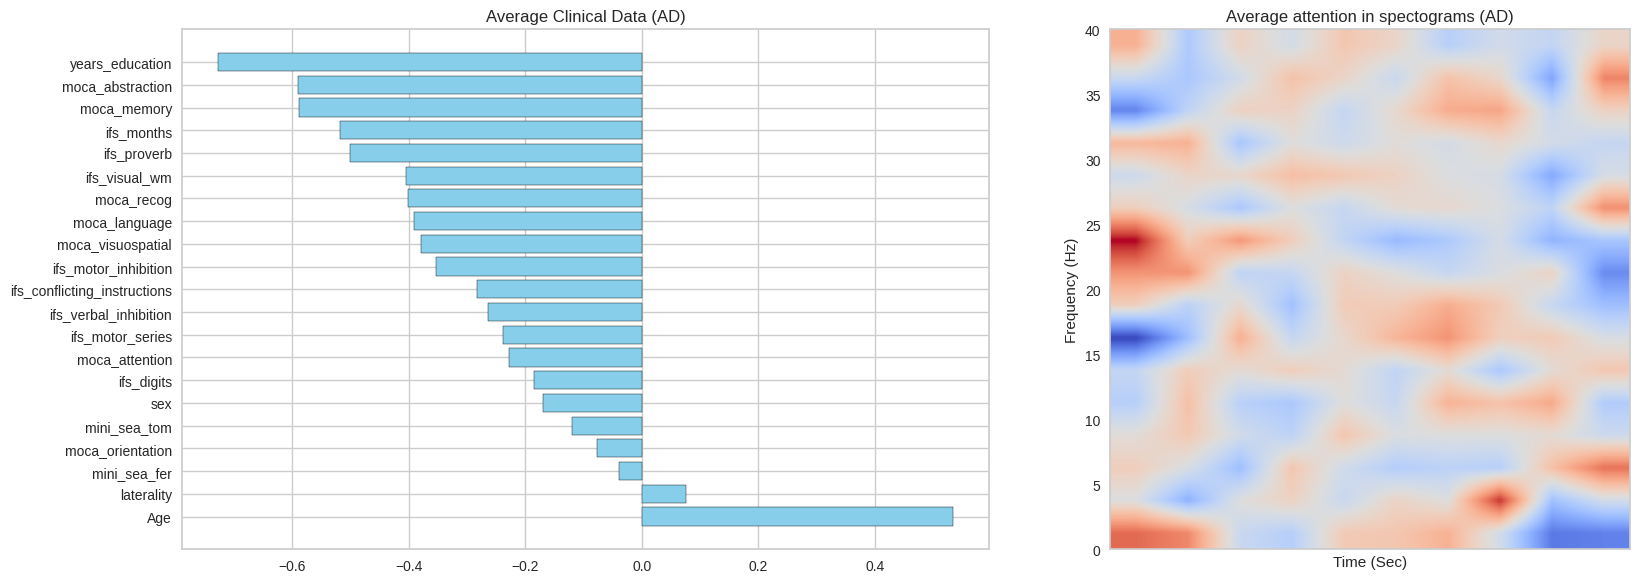

Promedio de datos clínicos para AD:  -0.27845873896818185
Promedio de atención en espectrogramas para AD:  0.0999999234459271
1/1 [==============================] - 0s 125ms/step


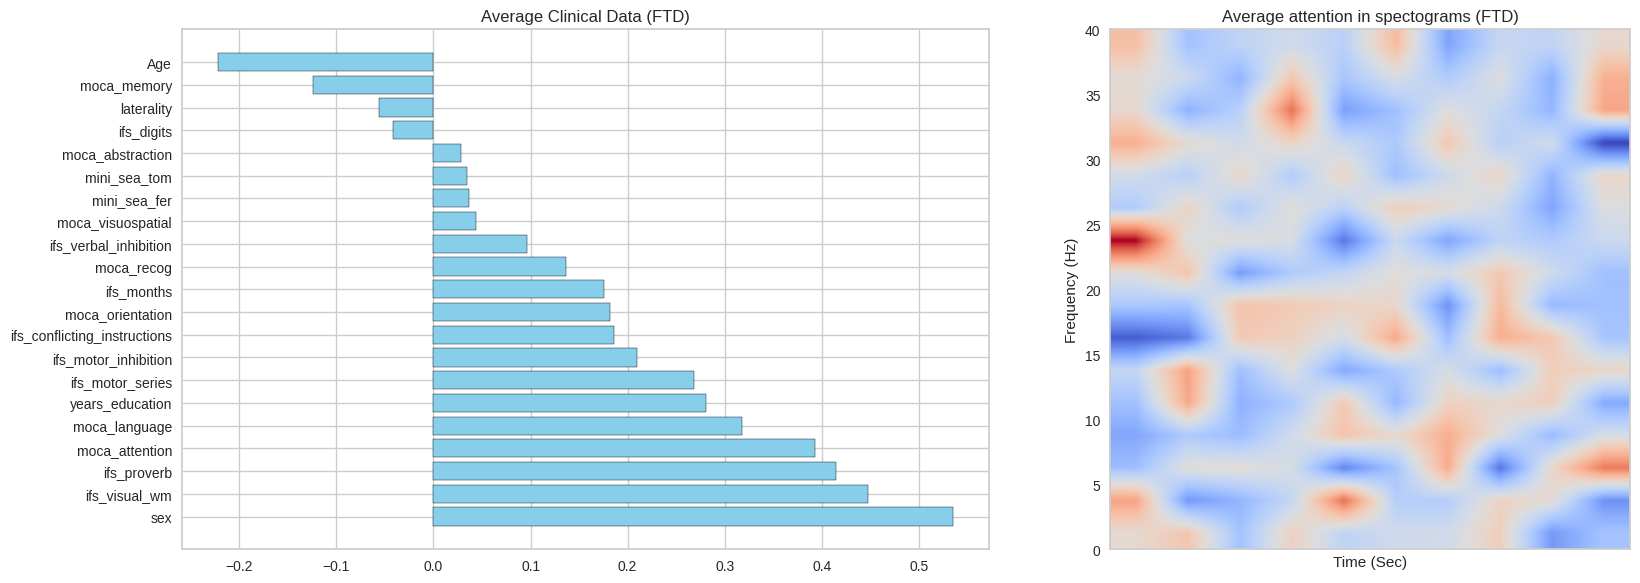

Promedio de datos clínicos para FTD:  0.15915828741712387
Promedio de atención en espectrogramas para FTD:  0.10000002839474716
1/1 [==============================] - 0s 124ms/step


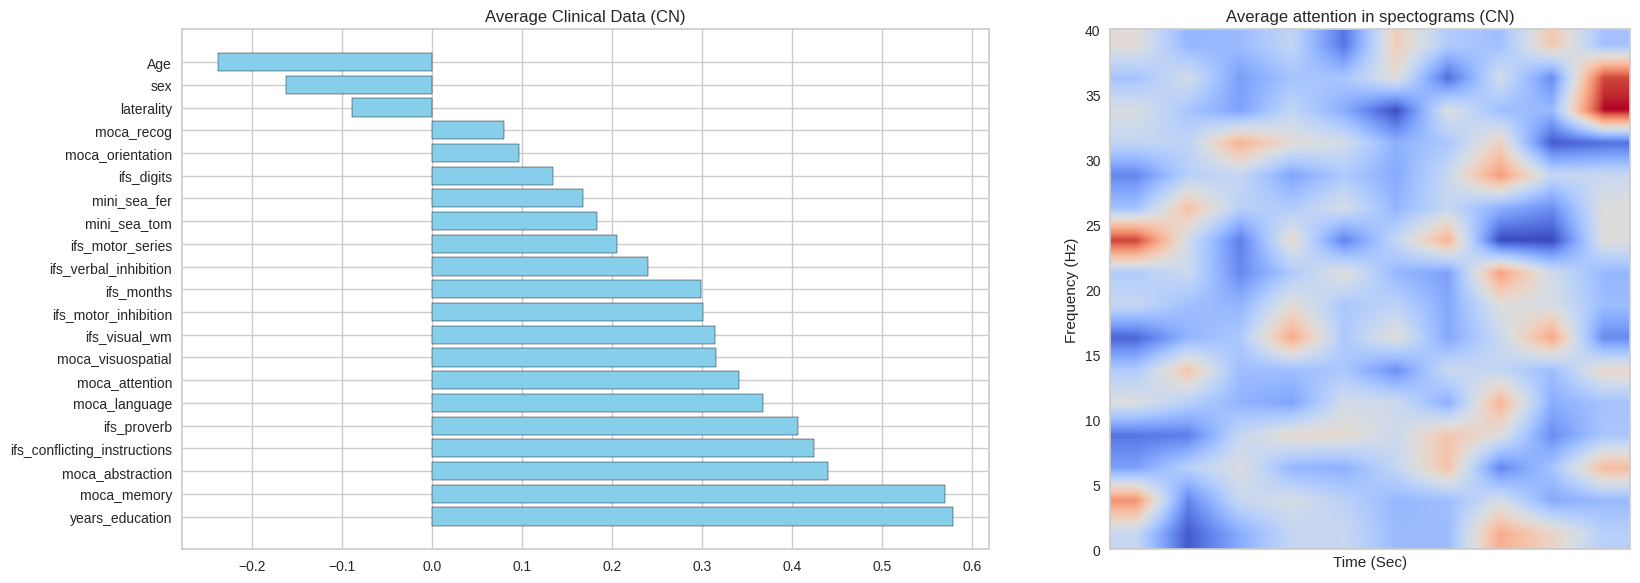

Promedio de datos clínicos para CN:  0.2367573274172
Promedio de atención en espectrogramas para CN:  0.09999993341235884


In [ ]:
# Nombres de las características clínicas
feature_names = features.columns

# Graficar los promedios de atención por clase usando `extended_model`
plot_class_attention(extended_model, AD_eeg, AD_flat, feature_names, class_name="AD",var='coolwarm')
plot_class_attention(extended_model, FTD_eeg, FTD_flat, feature_names, class_name="FTD",var='coolwarm')
plot_class_attention(extended_model, CN_eeg, CN_flat, feature_names, class_name="CN",var='coolwarm')

In [ ]:
# # Nombres de las características clínicas
# feature_names = features.columns

# # Graficar los promedios de atención por clase usando `extended_model`
# plot_class_attention(extended_model, AD_eeg, AD_flat, feature_names, class_name="AD",var='jet')
# plot_class_attention(extended_model, FTD_eeg, FTD_flat, feature_names, class_name="FTD",var='jet')
# plot_class_attention(extended_model, CN_eeg, CN_flat, feature_names, class_name="CN",var='jet')